In [109]:
# Packages
# in CMD - pip install seaborn
#        - pip install ttkthemes
#        - pip install pyqt5
# in Jupyter Notebook - !pip install ttkthemes

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
import os
import warnings
warnings.filterwarnings(action='ignore')
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from distutils.util import strtobool
from ttkthemes import ThemedTk
from PyQt5 import QtWidgets
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import pathlib
from pandastable import Table, TableModel

In [110]:
# GUI

#curr_options = ["SINGLEPULSE", "PULSEDDYNAMIC", "PULSED"]
#curr_amps = ["A", "mA"]
ordr = [1,2,3,4,5,6,7,8,9]
t_f = ['False', 'True']
#incs = [1,2,5,10]

def browse_button():
    # Allow user to select a directory and store it in global var
    # called folder_path
    global folder_path
    filename = filedialog.askdirectory()
    folder_path.set(filename)

root = ThemedTk(theme='adapta')
root.title("GUI")

# General Inputs
Label(root, text = "General Inputs", font=("Arial Bold", 12)).grid(row = 0, sticky = W)

Label(root, text = "Directory").grid(row = 1, sticky = W)
Label(root, text = "Filename(s) (Please have same first letters if multiple datasheets)").grid(row = 2, sticky = W)
Label(root, text = "Filetype").grid(row = 3, sticky = W)

# Output Info
Label(root, text = "Output Folder Location (If default - create gm_output folder inside directory)").grid(row = 10, sticky = W)
# Overwrite or no
Label(root, text = "Allow Overwriting Output Files?").grid(row = 11, sticky = W)

# Graph Options
Label(root, text = "Graph Options", font=("Arial Bold", 12)).grid(row = 12, sticky = W)

# What order
#Label(root, text = "Order (Ex: 1=Linear)").grid(row = 16, sticky = W)
# Show points or no
#Label(root, text = "Show Points?").grid(row = 17, sticky = W)
# Export or no as excel worksheet
Label(root, text = "Export as Excel Worksheet?").grid(row = 18, sticky = W)

# Directory
folder_path = StringVar()
e0 = ttk.Entry(master=root,textvariable=folder_path)
#e0.insert(0, '')
dir_button = ttk.Button(text="Browse", command=browse_button)
# Filename(s)
e1 = ttk.Entry(root)
e1.insert(0, "30MILL-SANAM")
# Filetype
e2 = ttk.Entry(root)
e2.insert(0, ".xlsx")

# Output directory
e9 = ttk.Entry(root)
e9.insert(0, 'gm_output')
# Dropdown menu
e10 = StringVar(root)
e10.set(t_f[0])
e10x = OptionMenu(root,e10,*t_f)

# Dropdown menu
#g5 = StringVar(root)
#g5.set(ordr[2])
#g5x = OptionMenu(root,g5,*ordr)

# Dropdown menu
#g6 = StringVar(root)
#g6.set(t_f[0])
#g6x = OptionMenu(root,g6,*t_f)

# Dropdown menu
g7 = StringVar(root)
g7.set(t_f[0])
g7x = OptionMenu(root,g7,*t_f)

e0.grid(row = 1, column = 1)
dir_button.grid(row=1, column=2)
e1.grid(row = 2, column = 1)
e2.grid(row = 3, column = 1)
e9.grid(row = 10, column = 1)
e10x.grid(row = 11, column = 1)

#g5x.grid(row = 16, column = 1)
#g6x.grid(row = 17, column = 1)
g7x.grid(row = 18, column = 1)

def getInput():

    a = e0.get()
    b = e1.get()
    c = e2.get()
    j = e9.get()
    k = e10.get()
    #q = int(g5.get())
    #r = g6.get()
    s = g7.get()
    
    root.destroy()

    global overall
    overall = [a,b,c,j,k,s]

root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
    
ttk.Button(root, text = "Submit",
           command = getInput).grid(sticky = E, row = 50)
mainloop()

In [111]:
# Kill script if GUI has empty spots

import ctypes  # An included library with Python install.
def Mbox(title, text, style):
    return ctypes.windll.user32.MessageBoxW(0, text, title, style)

if '' in overall:
    Mbox('Error!', 'At least one entry in the GUI is empty - please fix', 0)
    sys.exit() # Kill script

In [112]:
# Input info
directory = pathlib.Path(overall[0])  # Provide the location of the excel files * Please use forward slashes
name = overall[1]  #*RA* Provide the model a.k.a. everything before the temperature (prob change here)
file_type = overall[2]  # If reading in multiple files - they all have to be the same file type

# Output info
output_f = overall[3]  # <- This is where the folder where you would like to put all the images of the graphs
                     # NOTE: Put the desired location of where the folder is located here
                     # If the file is in the same location as your directory, all you need to do is put the folder name here
                     # * NO backward slashes only forward
# Allow Overwriting or no? - Default=False
over = bool(strtobool(overall[4]))

In [6]:
# Select the columns you want from the excel spreadsheet

select_cols = ['Filename', 'Number', 'Phi / °', 'Theta / °', 'Integration Time / ms', 'Source current - Currentsource / mA', 'Current - Currentsource / mA',
               'Voltage - Currentsource / V', 'Radiometric / W/m²', 'Photometric / lx', 'x - Color Coordinates',
              'y - Color Coordinates', 'u - Color Coordinates', 'v1976 - Color Coordinates', 'Peak Wavelength / nm', 
              'Centroid Wavelength / nm', 'Dominant Wavelength / nm', 'CRI', 'CRI09 - CRI'] 
               #'Partial luminous flux / lm', 'Partial radiant power / W'

# Add columns here for any calculations
# Calculated columns will be appended to the dataframe
#column_d = ['Voltage  - Currentsource / V', 'x - Color Coordinates', 'y - Color Coordinates', 'Peak Wavelength / nm', 
        #    'Dominant Wavelength / nm', 'Centroid Wavelength / nm'] # Change (-) columns
#column_p = ['Radiometric / W', 'Photometric / lm'] # Relative (%) columns

# Here: rename all selected columns & calculated columns - don't forget calculated columns are added towards the end
# Change columns first then relative columns

#column_rn = ['Serial Number', 'Δ Forward Voltage (Vf)', 'Δ CIEx', 'Δ CIEy', 'Δ Peak Wavelength (λp)', 'Δ Centroid Wavelength (λcen)', 
#             'Δ Dominant Wavelength (λd)', 'Δ CCT / K', 'Δ CRI', 'Δ R 9', 'Δ FWHM', 'Relative Radiant Power', 'Relative Luminous Flux', 'Tj (°C)', 'lf (A)' ]


# 'Last Dark Current (min)', 'Signal Level (counts)', 'Signal Level (%)', 'Scotopic Luminous Flux', 'UVA (W)', 'UVB (W)', 
# 'UVC (W)', 'VIS (W)', 'TRIx', 'TRIy', 'TRIz', 'CIEz', 'CIEu', 'v1960', 'v1976', 'Width (nm)', 'CRI', 'Red Effect (%)', 
# 'Vis Effect (%)', 'CCT',

In [7]:
# IMPORTANT - OUTPUT
# Select columns here - this is what outputs the graphs
# Add more columns & titles here if necessary

# Renamed name of temperature and current column

y1 = 'x - Color Coordinates'
y2 = 'y - Color Coordinates'
y3 = 'u - Color Coordinates'
y4 = 'v1976 - Color Coordinates'
y5 = 'Peak Wavelength / nm'
y6 = 'Centroid Wavelength / nm'
y7 = 'Dominant Wavelength / nm'
y8 = 'CRI'
y9 = 'CRI09 - CRI'

# Show all of y variables (number of columns that we would like outputs for), only change if removing or adding columns
y_n = [y1,y2,y3,y4,y5,y6,y7,y8,y9]

row_size = 5 # Make sure row and column size can accomodate all the subplots
column_size = 2
ax_n = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0)] # the axes for the subplots

# Graph order number - 1 = linear, 2 = quadratic, 3 = cubic, etc.
#ord_num = overall[4]

# Show points or no?
#show_pt = bool(strtobool(overall[5]))

# Export as Excel Worksheet or no?
exp = bool(strtobool(overall[5]))

In [8]:
# Change directory
os.chdir(directory)
pathlib.Path.cwd()

WindowsPath('C:/Users/Chelton Kuang/Documents/gm_input')

In [9]:
# Check whether the specified path exists or not
isExist = os.path.exists(output_f)

if not isExist:
  
  # Create output dir if doesn't exist
  os.makedirs(output_f)
  Mbox("Create output dir", "The output directory has been created: " + output_f, 0)

In [10]:
# Identifies all filenames in the directory

filesnames = os.listdir()
filesnames = [f for f in filesnames if (f.startswith(name) and f.lower().endswith(file_type))]

# Read in excel files as dataframe

# Here we concat similarly named files together - nice for putting together different test datasets on the same chips

#df = pd.concat(map(pd.read_excel, filesnames)) # Change to read_csv for csv files

df = pd.DataFrame()

for file in filesnames:
    df_temp = pd.read_excel(file)
    df_temp['Filename'] = file
    df = df.append(df_temp)

df['Filename'] = df['Filename'].str.split('.').str.get(0)
df = df[ ['Filename'] + [ col for col in df.columns if col != 'Filename' ] ]
df

Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
0    30MILL-SANAM-1       1        0        -90                   1000   
1    30MILL-SANAM-1       2        0        -85                   1000   
2    30MILL-SANAM-1       3        0        -80                   1000   
3    30MILL-SANAM-1       4        0        -75                   1000   
4    30MILL-SANAM-1       5        0        -70                   1000   
..              ...     ...      ...        ...                    ...   
143  30MILL-SANAM-5     144      135        -70                     20   
144  30MILL-SANAM-5     145      135        -75                     20   
145  30MILL-SANAM-5     146      135        -80                     20   
146  30MILL-SANAM-5     147      135        -85                     20   
147  30MILL-SANAM-5     148      135        -90                     20   

     Averages Filter  Signal Level / Counts  Signal Level / %  \
0         1.0   none                    685                 1   
1         1.0   none                    721                 1   
2         1.0   none                   1587                 2   
3         1.0   none                   8704                14   
4         1.0   none                  31066                50   
..        ...    ...                    ...               ...   
143       NaN    NaN                    315                 0   
144       NaN    NaN                    311                 0   
145       NaN    NaN                    310                 0   
146       NaN    NaN                    309                 0   
147       NaN    NaN                    309                 0   

                                     Measurement Setup  ...      Time  \
0    CAS 140D UVC-NIR 086614421 - 0866144G1 - LEDGO...  ...  13:54:59   
1    CAS 140D UVC-NIR 086614421 - 0866144G1 - LEDGO...  ...  13:55:09   
2    CAS 140D UVC-NIR 086614421 - 0866144G1 - LEDGO...  ...  13:55:20   
3    CAS 140D UVC-NIR 086614421 - 0866144G1 - LEDGO...  ...  13:55:32   
4    CAS 140D UVC-NIR 086614421 - 0866144G1 - LEDGO...  ...  13:55:46   
..                                                 ...  ...       ...   
143                                                NaN  ...  13:35:37   
144                                                NaN  ...  13:35:38   
145                                                NaN  ...  13:35:40   
146                                                NaN  ...  13:35:42   
147                                                NaN  ...  13:35:43   

    Distance probe to detector / mm  Solid angle / sr  \
0                               316          0.034259   
1                               316          0.068256   
2                               316          0.067476   
3                               316          0.066183   
4                               316          0.064385   
..                              ...               ...   
143                             316          0.064385   
144                             316          0.066183   
145                             316          0.067476   
146                             316          0.068256   
147                             316          0.034259   

     Calculated Luminous Intensity / cd  Calculated Radiant Intensity / W/sr  \
0                              0.000040                             0.000012   
1                              0.000037                             0.000014   
2                              0.000101                             0.000047   
3                              0.000373                             0.000315   
4                              0.000869                             0.001132   
..                                  ...                                  ...   
143                           -0.000084                             0.000015   
144                           -0.000021                             0.000005   
145                           -0.000106                    

In [11]:
# Double check if imported worksheets are not empty - if empty, script is killed

if df.empty:
    Mbox('Error!', 'Imported worksheets are empty', 0)
    sys.exit() # Kill script

In [12]:
# Double check if expected columns are not missing

try:
    df = df[select_cols]
except KeyError as e:
    Mbox('Error!', repr(e) + '\n Fix then Restart & Run All', 0)
    sys.exit() # Kill script

In [13]:
# Select columns needed - ADD OR REMOVE AS NEEDED

df = df.fillna(0)

#df = df[df[cols_puls] == pulse_width]
#df = df.drop([cols_puls], axis=1)
#df = df.dropna()
#df

In [14]:
# Check for any zeros
'''
xdl = []
xd = df[(df.iloc[:,3:] == 0).any(axis=1)]
for i in xd['Number'].unique():
    xdl.append(i)

if xdl:
    Mbox('Warning!', 'Please double-check these numbers / rows - ' + str(xdl) + '\n The rows will be dropped.', 0)
    ''';

In [15]:
# Drop any rows that have 0s
'''
indices = df.loc[(df.iloc[:,3:] == 0).any(axis=1), :].index.tolist()
for ind in indices:
    df = df.drop(ind)
''';

In [16]:
# If Voltage above 200v, point out row and drop

df_200v = df[df['Voltage - Currentsource / V'] >= 200]
df = df[df['Voltage - Currentsource / V'] < 200]
if not df_200v.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations above 200v which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=df_200v,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'At least one observation has voltage above 200v \n they will be dropped', 0)

In [17]:
# Function for version checking saved images for pngs

def version_png(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    plt.savefig('{}{:d}.png'.format(filename, i), bbox_inches='tight')

# Average of different parts

In [18]:
dfs = df.groupby(['Phi / °', 'Theta / °']).max().reset_index()
dfs = dfs.drop(['Filename'], axis=1)

In [19]:
# Calculations (one df for max normalization & another for theta = 0 normalization)

dfmax = dfs.groupby('Phi / °').max().reset_index()
dftheta = dfs[dfs['Theta / °'] == 0]

# Columns besides radiometric & photometric are normalized to theta = 0
test = (dfs.set_index('Phi / °').iloc[:,8:17]-dftheta.set_index('Phi / °').iloc[:,8:17]
        .reindex(dfs['Phi / °'])).dropna(axis=0).reset_index()
test2 = (dfs.set_index('Phi / °').iloc[:,[6,7]] / dfmax.set_index('Phi / °').iloc[:,[6,7]]
                .reindex(dfs['Phi / °'])).dropna(axis=0).reset_index()
test2.iloc[:,1:] = test2.iloc[:,1:].mul(100)

# Max normalized for radio & photo, rest are theta normalized
dfmaxz = pd.concat([dfs.iloc[:,0:7], test2.iloc[:,1:], test.iloc[:,1:]], axis=1)

# All theta normalized
test2 = (dfs.set_index('Phi / °').iloc[:,[6,7]] / dftheta.set_index('Phi / °').iloc[:,[6,7]]
                .reindex(dfs['Phi / °'])).dropna(axis=0).reset_index()
test2.iloc[:,1:] = test2.iloc[:,1:].mul(100)
dfthetaz = pd.concat([dfs.iloc[:,0:7], test2.iloc[:,1:], test.iloc[:,1:]], axis=1)

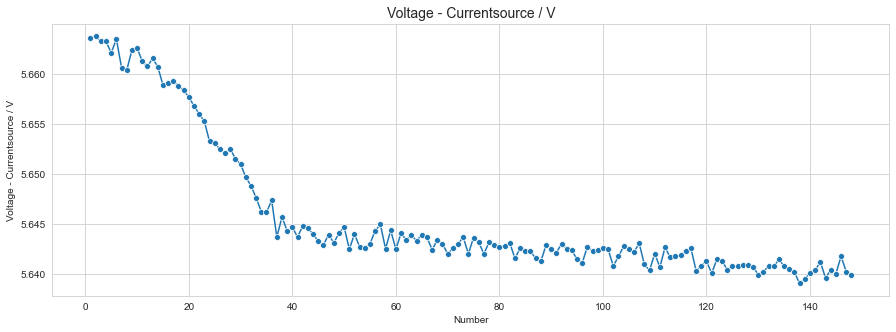

In [20]:
# Number vs Voltage
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,5

sns.set_style("whitegrid")
sns.lineplot(x='Number', y='Voltage - Currentsource / V', data=dfs, ci=False, marker = 'o')
plt.title('Voltage - Currentsource / V', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Voltage_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Voltage.png', bbox_inches='tight');

# Radiometric - By Phi

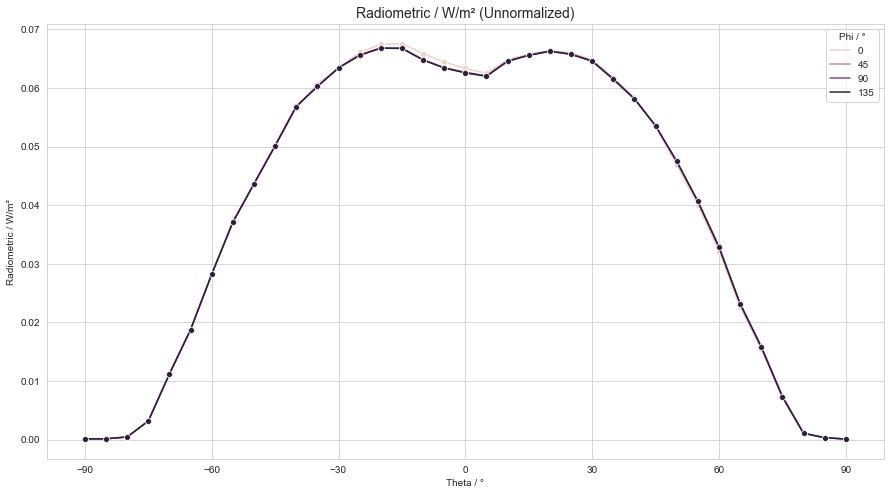

In [21]:
# Theta vs Radiometric by Phi (Unnormalized)

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Phi / °', data=dfs, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Radiometric / W/m² (Unnormalized)', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Unnorm_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Unnorm.png', bbox_inches='tight');

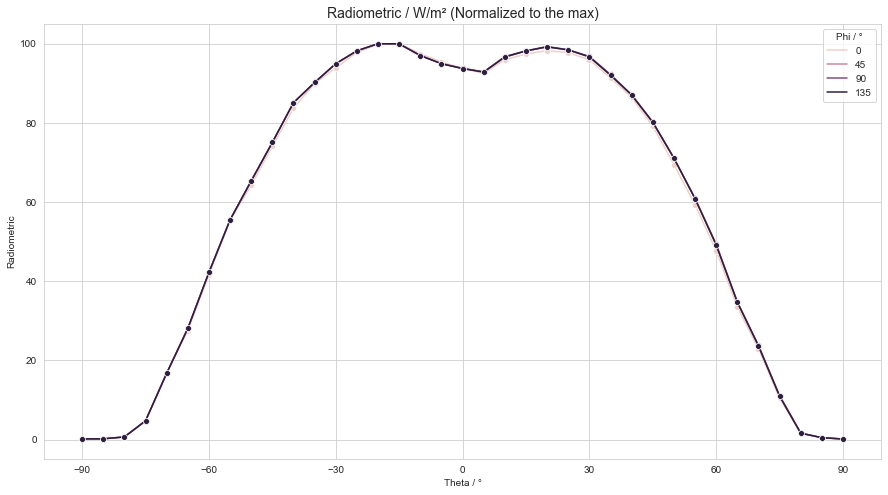

In [22]:
# Theta vs Radiometric by Phi (Normalized to the max)

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Phi / °', data=dfmaxz, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max)', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Max_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Max.png', bbox_inches='tight');

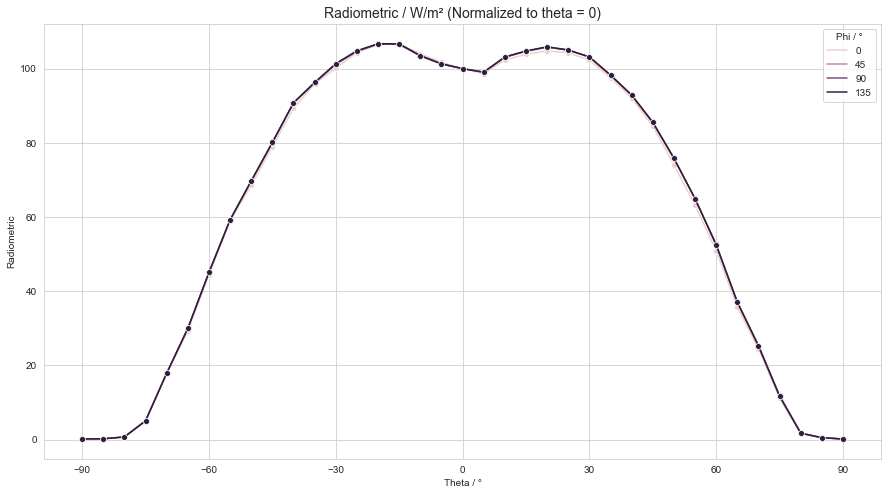

In [23]:
# Theta vs Radiometric by Phi (Normalized to theta = 0)

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Phi / °', data=dfthetaz, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0)', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Theta0_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Theta0.png', bbox_inches='tight');

# Radiometric - Averaged

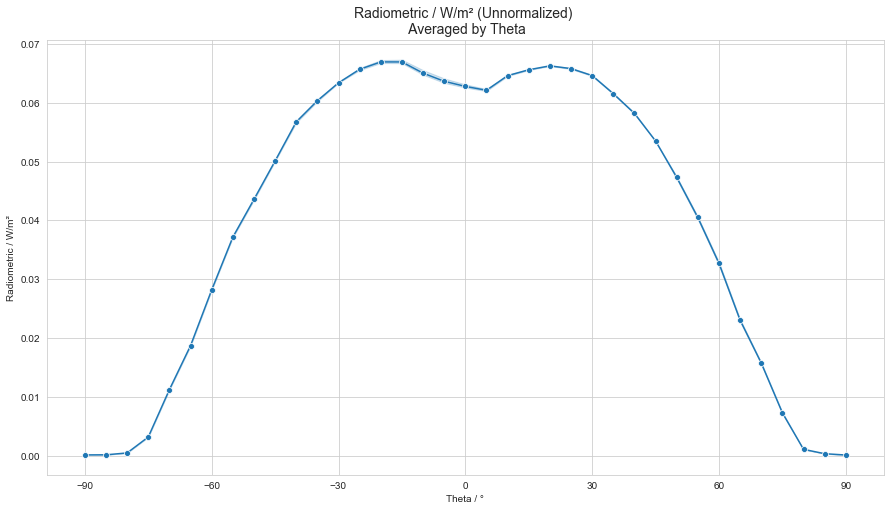

In [24]:
# Theta vs Radiometric by Phi (Unnormalized) - Averaged by Theta

#dfs_all = dfs.groupby('Theta / °').mean().reset_index()

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', data=dfs, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Radiometric / W/m² (Unnormalized) \n Averaged by Theta', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Unnorm_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Unnorm_Avg.png', bbox_inches='tight');

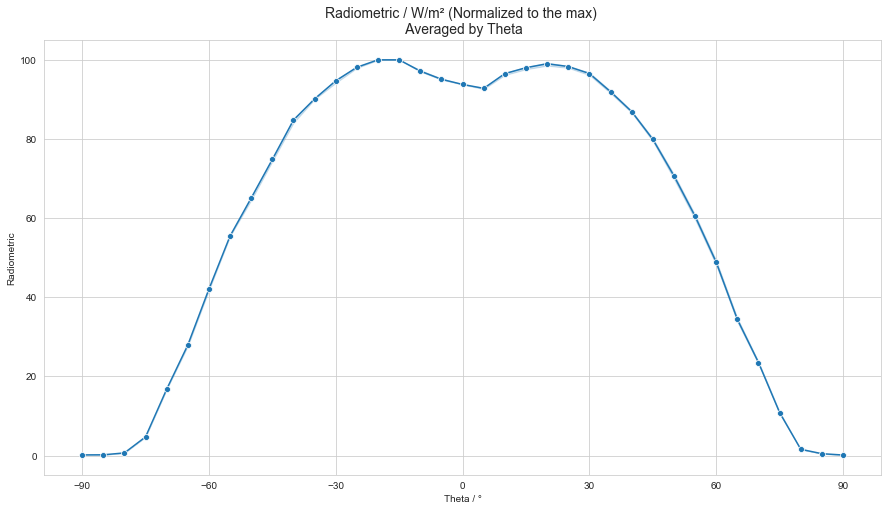

In [25]:
# Theta vs Radiometric by Phi (Normalized to the max) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', data=dfmaxz, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max) \n Averaged by Theta', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Max_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Max_Avg.png', bbox_inches='tight');

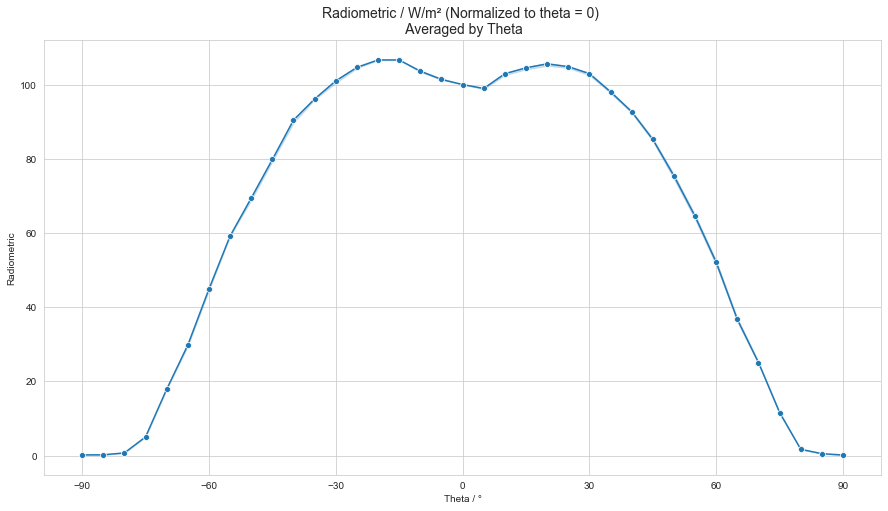

In [26]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', data=dfthetaz, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0) \n Averaged by Theta', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Theta0_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Theta0_Avg.png', bbox_inches='tight');

# Radiometric - Theta Absolute Values

In [27]:
dfs['Theta_Abs'] = dfs['Theta / °'].abs()
dfmaxz['Theta_Abs'] = dfmaxz['Theta / °'].abs()
dfthetaz['Theta_Abs'] = dfthetaz['Theta / °'].abs()

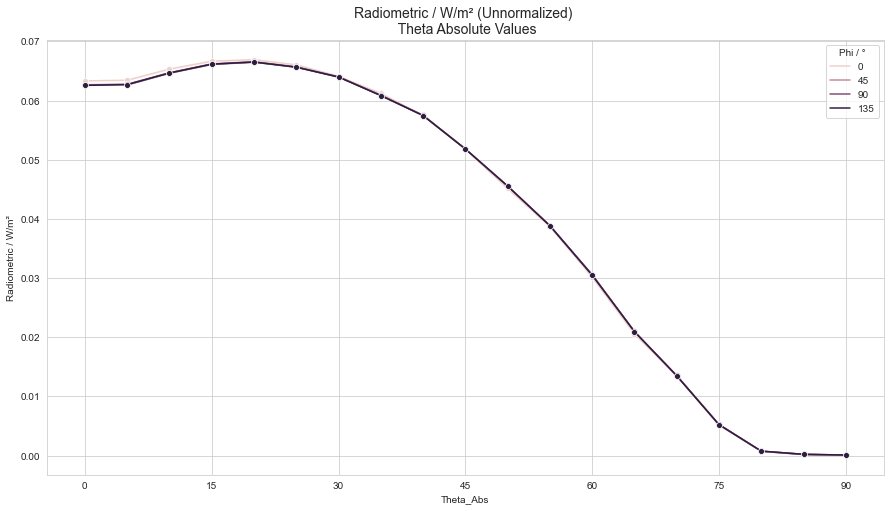

In [28]:
# Theta vs Radiometric by Phi (Unnormalized) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Phi / °', data=dfs, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.title('Radiometric / W/m² (Unnormalized) \n Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Unnorm_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Unnorm_Abs.png', bbox_inches='tight');

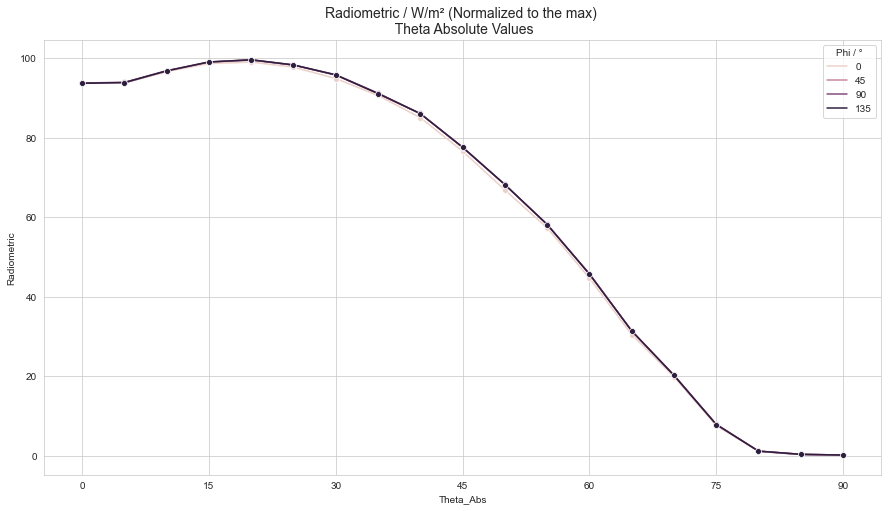

In [29]:
# Theta vs Radiometric by Phi (Normalized to the max) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Phi / °', data=dfmaxz, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max) \n Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Max_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Max_Abs.png', bbox_inches='tight');

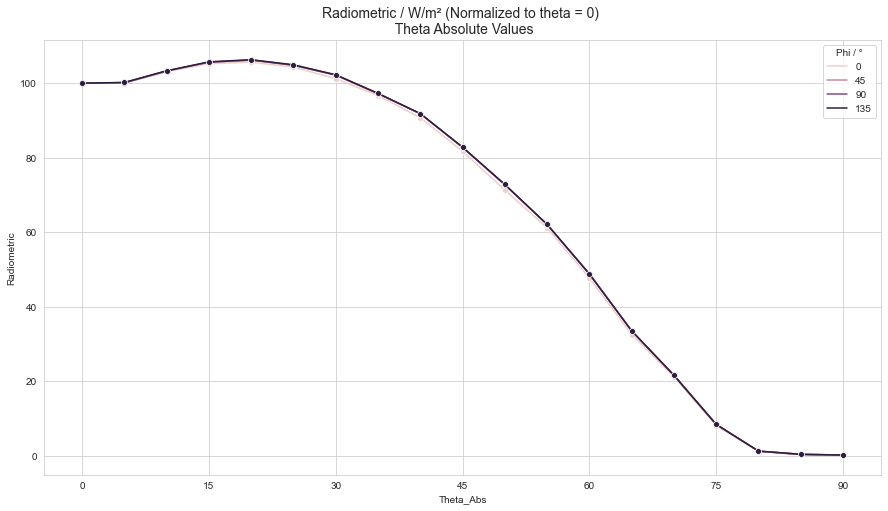

In [30]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Phi / °', data=dfthetaz, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0) \n Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Theta0_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Theta0_Abs.png', bbox_inches='tight');

# Radiometric - Averaged by Theta Absolute Values

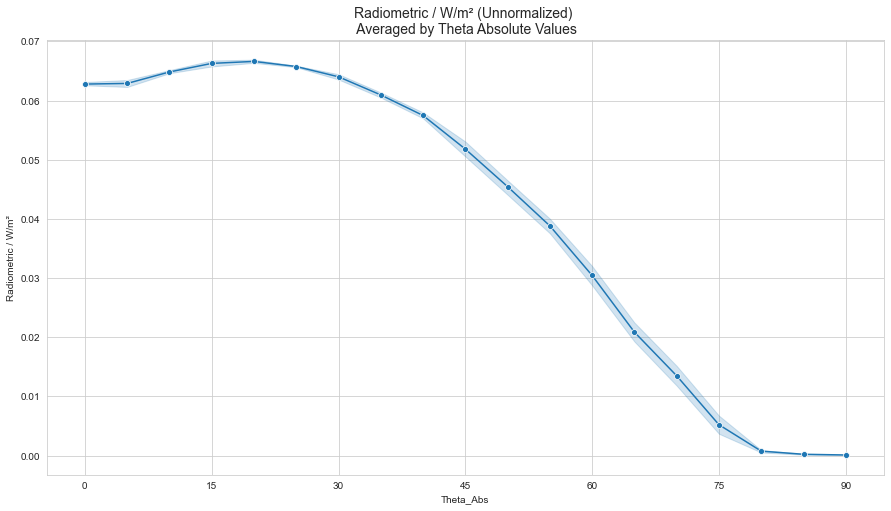

In [31]:
# Theta vs Radiometric by Phi (Unnormalized) - Averaged by Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', data=dfs, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.title('Radiometric / W/m² (Unnormalized) \n Averaged by Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Unnorm_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Unnorm_AvgAbs.png', bbox_inches='tight');

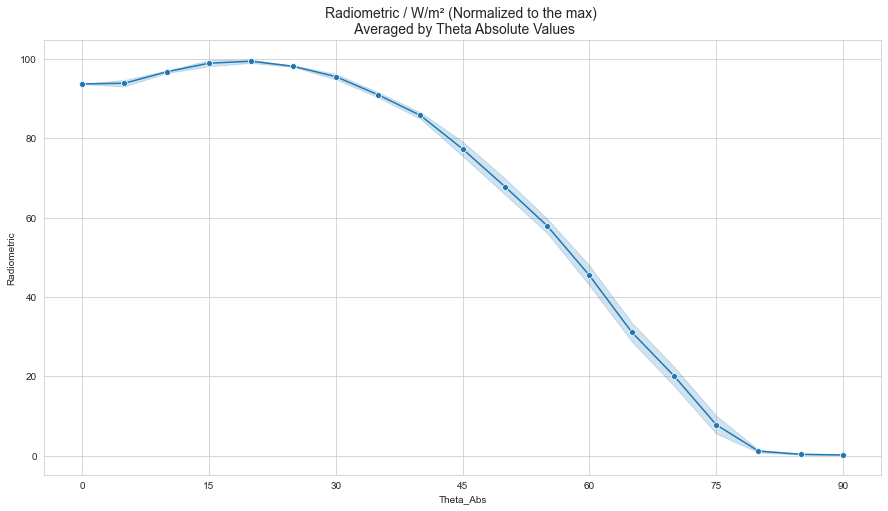

In [32]:
# Theta vs Radiometric by Phi (Normalized to the max) - Averaged by Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', data=dfmaxz, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max) \n Averaged by Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Max_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Max_AvgAbs.png', bbox_inches='tight');

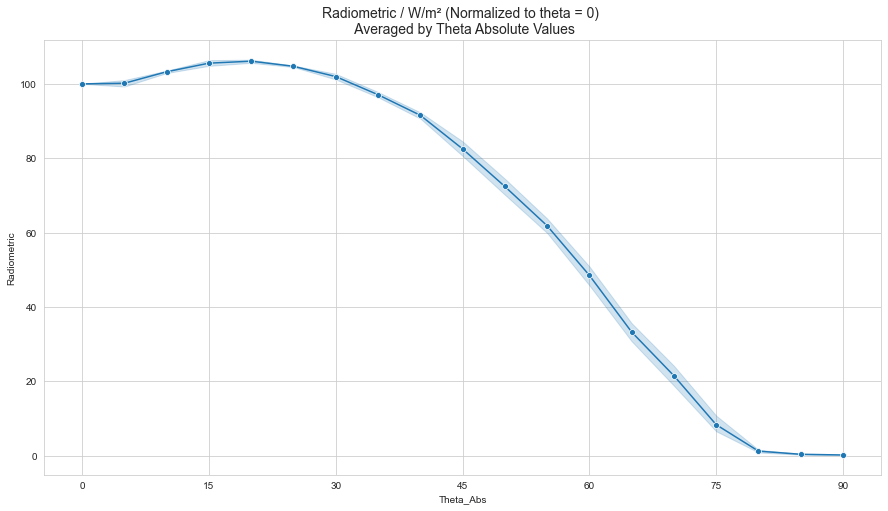

In [33]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Averaged by Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', data=dfthetaz, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0) \n Averaged by Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Radio_Theta0_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Radio_Theta0_AvgAbs.png', bbox_inches='tight');

# Photometric - By Phi

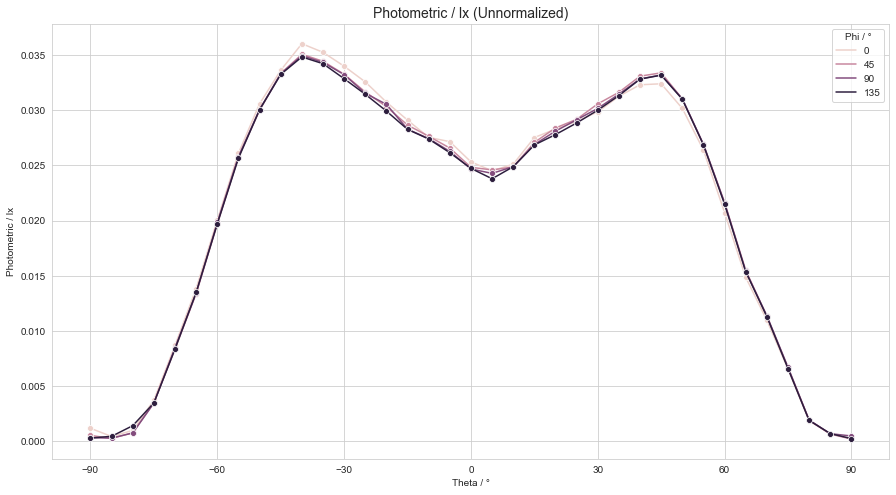

In [34]:
# Theta vs Photometric by Phi (Unnormalized)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Phi / °', data=dfs, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Photometric / lx (Unnormalized)', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Unnorm_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Unnorm.png', bbox_inches='tight');

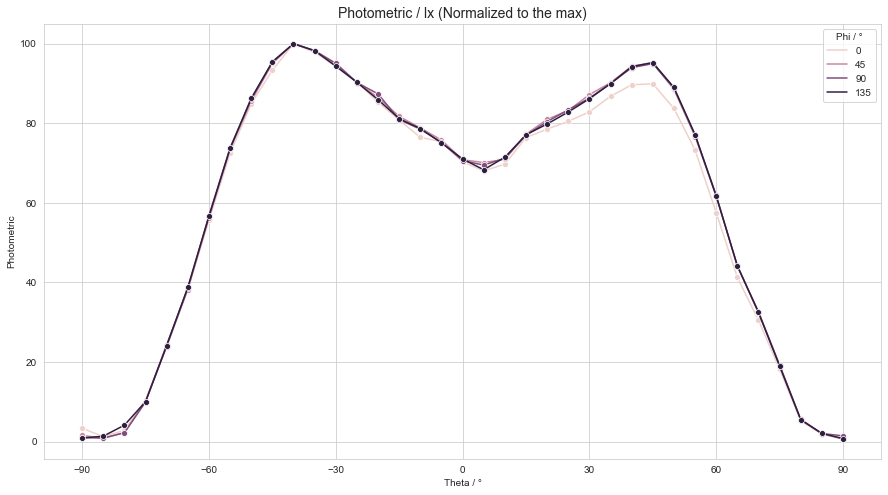

In [35]:
# Theta vs Photometric by Phi (Normalized to the max)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Phi / °', data=dfmaxz, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max)', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Max_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Max.png', bbox_inches='tight');

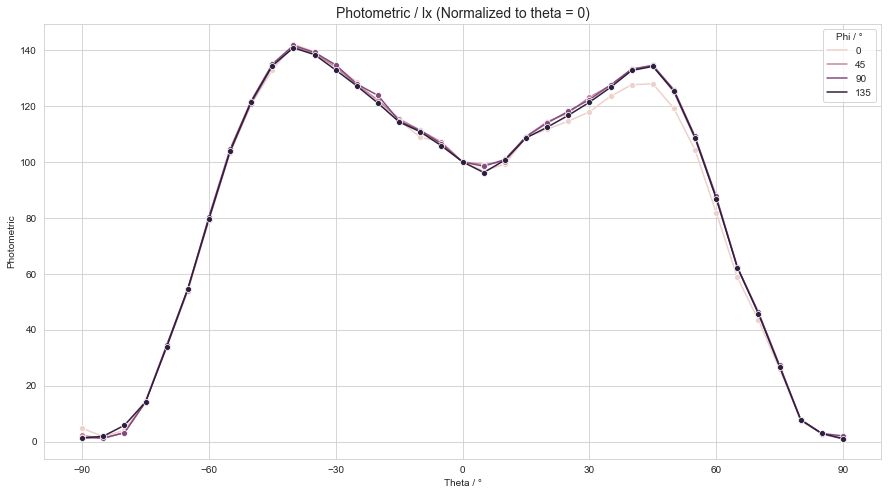

In [36]:
# Theta vs Photometric by Phi (Normalized to theta = 0)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Phi / °', data=dfthetaz, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0)', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Theta0_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Theta0.png', bbox_inches='tight');

# Photometric - Averaged by Theta

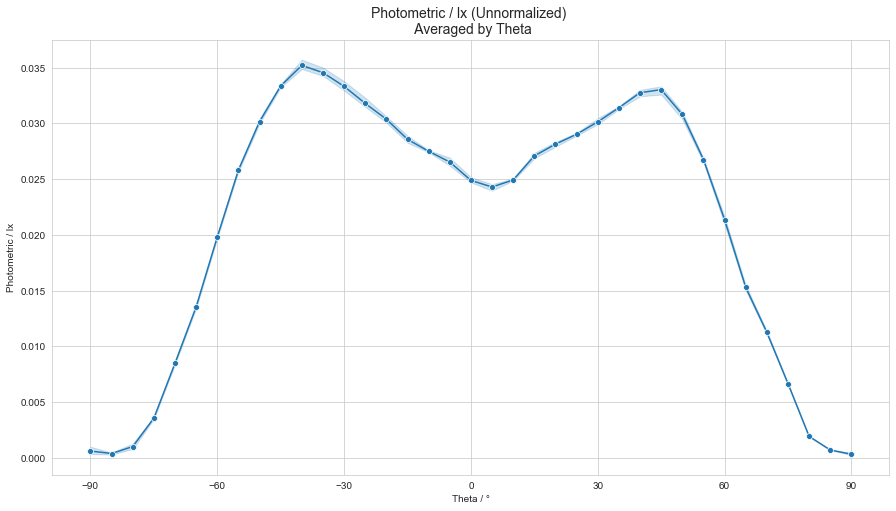

In [37]:
# Theta vs Photometric by Phi (Unnormalized) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Photometric / lx', data=dfs, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Photometric / lx (Unnormalized) \n Averaged by Theta', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Unnorm_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Unnorm_Avg.png', bbox_inches='tight');

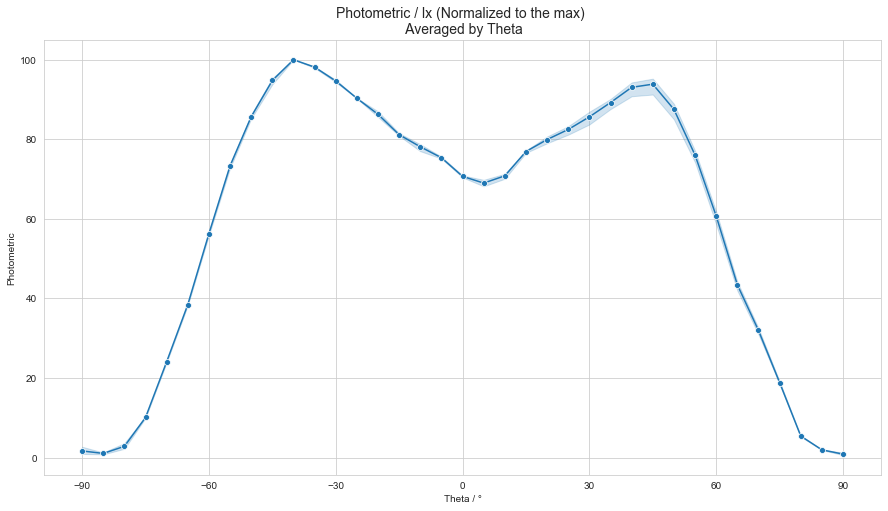

In [38]:
# Theta vs Photometric by Phi (Normalized to the max) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Photometric / lx', data=dfmaxz, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max) \n Averaged by Theta', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Max_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Max_Avg.png', bbox_inches='tight');

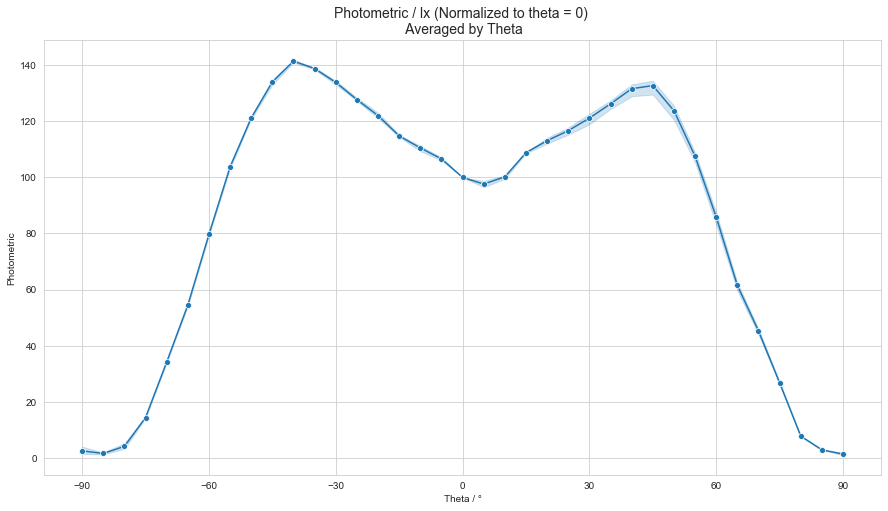

In [39]:
# Theta vs Photometric by Phi (Normalized to theta = 0) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Photometric / lx', data=dfthetaz, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0) \n Averaged by Theta', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Theta0_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Theta0_Avg.png', bbox_inches='tight');

# Photometric - Theta Absolute Values

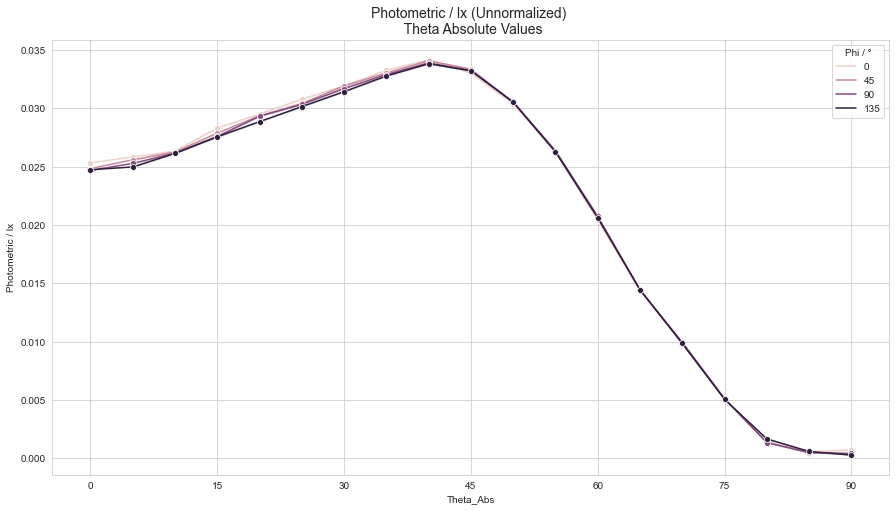

In [40]:
# Theta vs Radiometric by Phi (Unnormalized) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Phi / °', data=dfs, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.title('Photometric / lx (Unnormalized) \n Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Unnorm_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Unnorm_Abs.png', bbox_inches='tight');

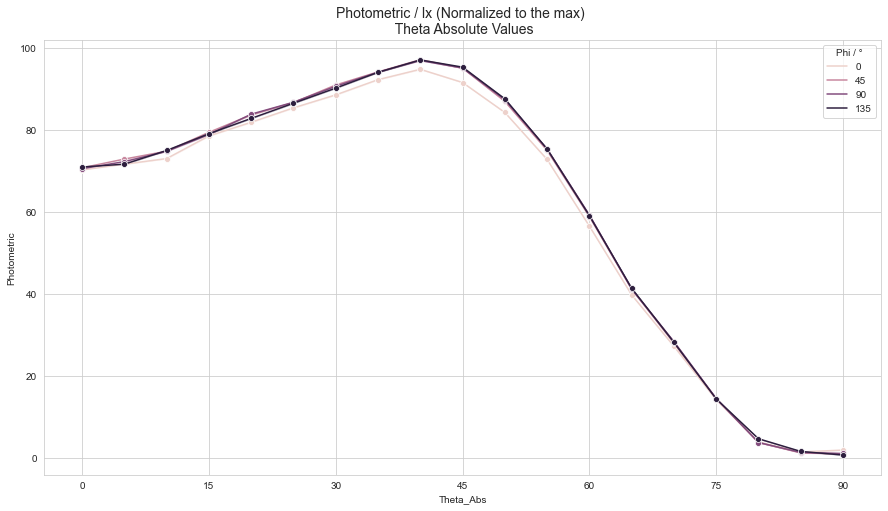

In [41]:
# Theta vs Radiometric by Phi (Normalized to the max) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Phi / °', data=dfmaxz, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max) \n Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Max_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Max_Abs.png', bbox_inches='tight');

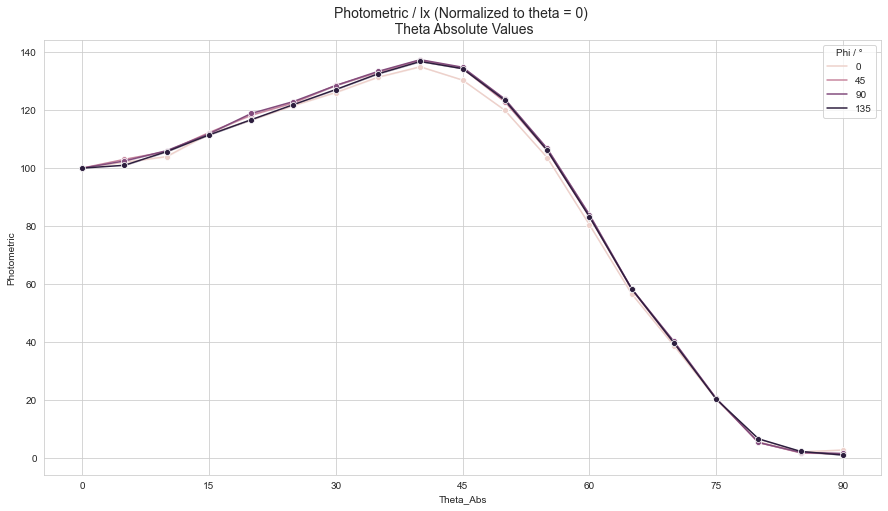

In [42]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Phi / °', data=dfthetaz, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0) \n Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Theta0_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Theta0_Abs.png', bbox_inches='tight');

# Photometric - Averaged by Theta Absolute Values

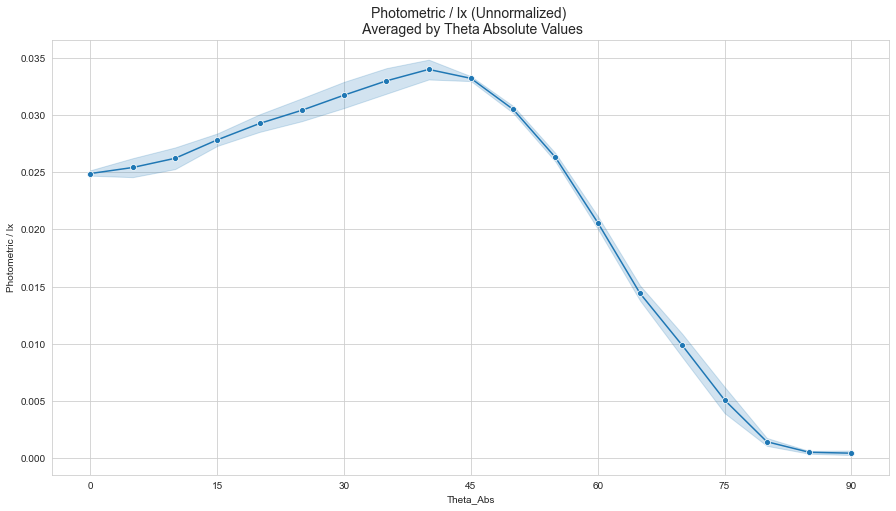

In [43]:
# Theta vs Radiometric by Phi (Unnormalized) - Averaged by Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', data=dfs, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.title('Photometric / lx (Unnormalized) \n Averaged by Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Unnorm_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Unnorm_AvgAbs.png', bbox_inches='tight');

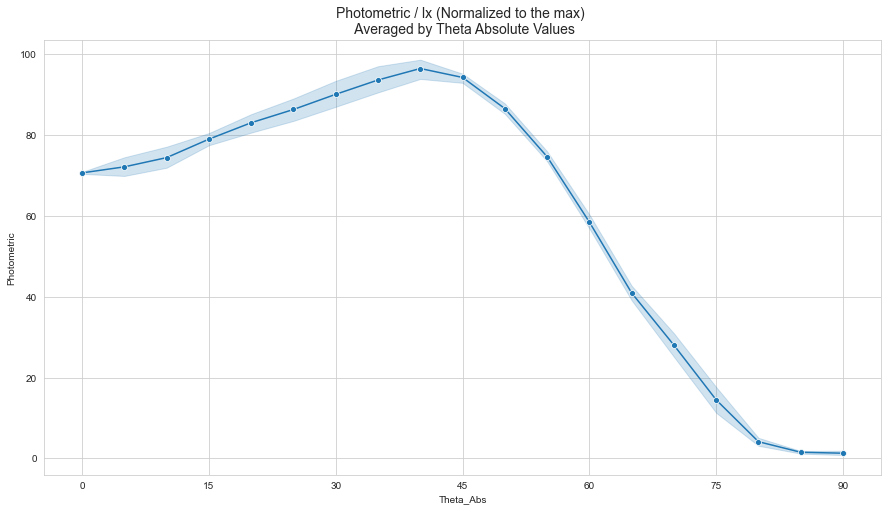

In [44]:
# Theta vs Radiometric by Phi (Normalized to the max) - Averaged by Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', data=dfmaxz, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max) \n Averaged by Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Max_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Max_AvgAbs.png', bbox_inches='tight');

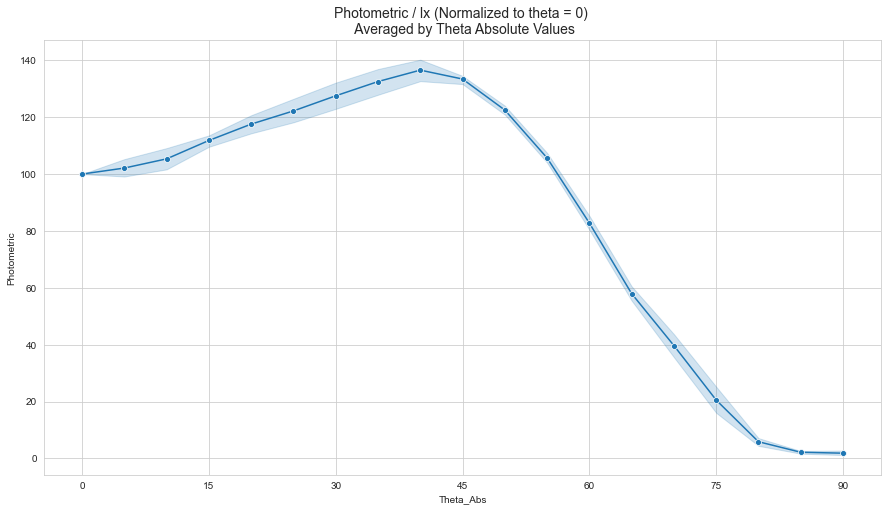

In [45]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Averaged by Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', data=dfthetaz, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0) \n Averaged by Theta Absolute Values', fontsize = 14)

if over == False:
    fname = output_f + '/' + name + '_Photo_Theta0_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_Photo_Theta0_AvgAbs.png', bbox_inches='tight');

# Polar Coordinates Plot

In [106]:
# Function for version checking saved images for pngs

def version_png_p(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    fig.savefig('{}{:d}.png'.format(filename, i))

In [46]:
# For Polar Plot - Select either Radiometric or Photometric in pop-up box

sel_list = ['Radiometric / W/m²', 'Photometric / lx']

root = ThemedTk(theme='arc')
root.title("GUI for Polar Plot")

Label(root, text = "Select Radiometric or Photometric").grid(row = 1, sticky = W)

e7 = StringVar(root)
e7.set(sel_list[0])
drop = ttk.OptionMenu(root,e7,*sel_list)

drop.grid(row = 2)
    
def kill():
    global h
    h = e7.get()
    root.destroy()
    
ttk.Button(root, text = "Submit",
        command = kill).grid(row = 50)

root.mainloop()

sel = h # or Photometric

In [47]:
# Groupby theta and take means - able to draw a nice curve

dfmaxz_mean = dfmaxz.groupby('Theta_Abs').mean().reset_index()
dfmaxz_mean[sel] = dfmaxz_mean[sel]/100

In [48]:
import math  # Change degrees to radians for plotting
def deg_to_rad(dr):
    return (dr*math.pi)/180
theta = deg_to_rad(dfmaxz_mean['Theta_Abs'])
theta_abs = dfmaxz_mean['Theta_Abs']
r = dfmaxz_mean[sel]

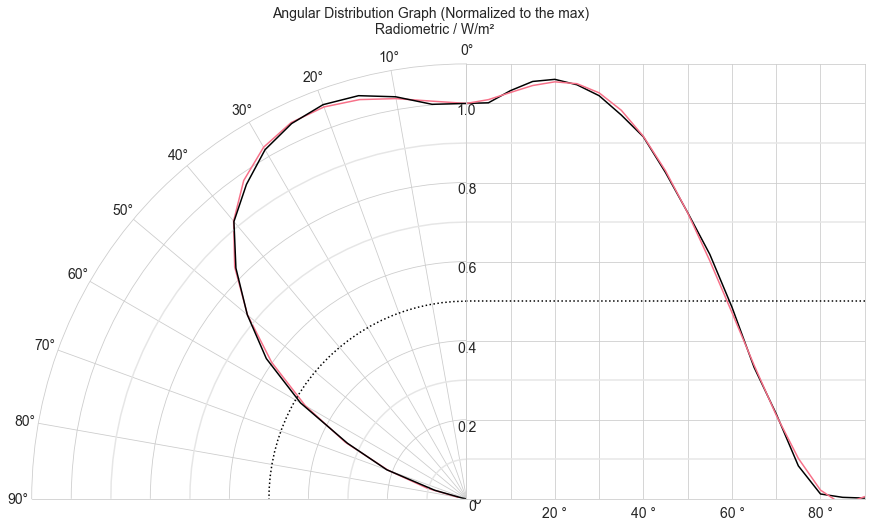

In [107]:
# Polar plot - Normalized to the max

from matplotlib import gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

fig = plt.figure()
fig.suptitle('Angular Distribution Graph (Normalized to the max) \n ' + sel, fontsize = 14)
gs = gridspec.GridSpec(1,2, width_ratios=[1,0.9]) 
ax0 = fig.add_subplot(gs[0], polar=True)
ax0.set_theta_zero_location("N") # Places 0 degrees to the North
ax0.plot(theta, r, c='black', zorder=111)
ax0.set_rlabel_position(90) # BUG: currently does not work with set_thetamin and thetamax - it should change labels to 90 deg
p = np.polyfit(theta, r, 4) # 4th order fit
yfit = np.polyval(p, theta)

# The fit plot
ax0.plot(theta, yfit, '-')
ax0.set_rlim(0,1.1)

# Radial = 0.5 plot
ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*0.5, color='black', linestyle='dotted')

# Add additional radial lines
lin = [0.1,0.3,0.7,0.9]
for i in lin:
    ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*i, color='0.9', linestyle='-')

ax0.set_thetamax(90) # Create a quarter polar graph

ax0.set_yticklabels([]) # Hide y-tick labels

# shared axis Y
ax1 = plt.subplot(gs[1], sharey = ax0)
ax1.tick_params(axis="y",direction="in", pad=-10)
ax1.plot(theta_abs, r, c='black')

# Only show tick labels multiple of 20
ax1.set_xticks([0,10,20,30,40,50,60,70,80,90])
xticks = ax1.xaxis.get_major_ticks()
xt = [0,1,3,5,7,9]
for x in xt:
    xticks[x].label1.set_visible(False)

ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0])

p = np.polyfit(theta_abs, r, 4)
yfit = np.polyval(p, theta_abs)

# The fit plot
ax1.plot(theta_abs, yfit, '-')

# Radial = 0.5 plot
ax1.hlines(y=0.5, xmin = 0, xmax = 90, color='black', linestyle='dotted')

# Add additional radial lines
for i in lin:
    ax1.hlines(y=i, xmin = 0, xmax = 90, color='0.9', linestyle='-')
    
#frequency = 2
#plt.xticks(dfthetaz_mean['Theta_Deg'][::frequency])

ax1.margins(x=0)

# Show tick labels below ticks
for tick in ax1.yaxis.get_majorticklabels():
    tick.set_verticalalignment("top")
    
# Add degree symbol to x-axis
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
    
# Shift plots as close as possible
plt.setp(ax0.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=-0.01, hspace=0)
if over == False:
    fname = output_f + '/' + name + '_Polar_Max_' + sel[:5] + '_'
    version_png_p(fname)
else:
    fig.savefig(output_f + '/' + name + '_Polar_Max_' + sel[:5] + '.png')
plt.show();

In [50]:
# Groupby theta and take means - able to draw a nice curve

dfthetaz_mean = dfthetaz.groupby('Theta_Abs').mean().reset_index()
dfthetaz_mean[sel] = dfthetaz_mean[sel]/100

In [51]:
import math  # Change degrees to radians for plotting
def deg_to_rad(dr):
    return (dr*math.pi)/180
theta = deg_to_rad(dfthetaz_mean['Theta_Abs'])
theta_abs = dfthetaz_mean['Theta_Abs']
r = dfthetaz_mean[sel]

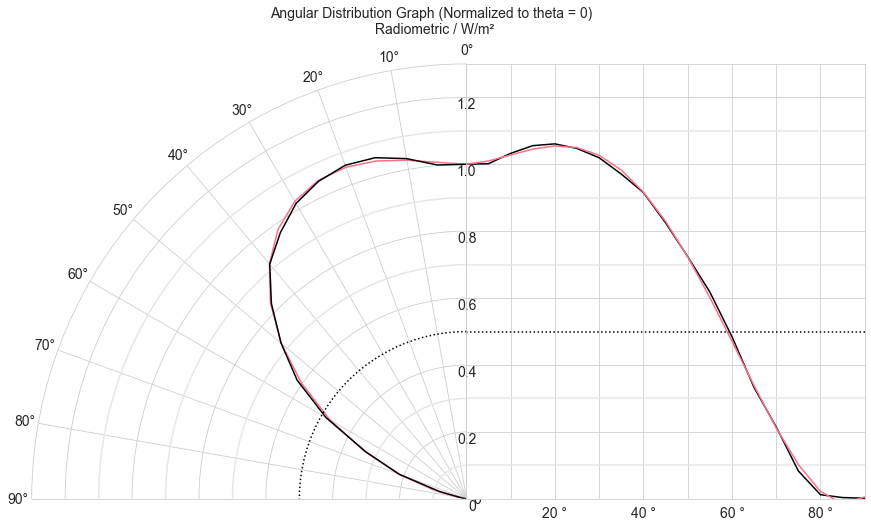

In [108]:
# Polar plot - Normalized to theta = 0

from matplotlib import gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

fig = plt.figure()
fig.suptitle('Angular Distribution Graph (Normalized to theta = 0) \n ' + sel, fontsize = 14)
gs = gridspec.GridSpec(1,2, width_ratios=[1,0.9]) 
ax0 = fig.add_subplot(gs[0], polar=True)
ax0.set_theta_zero_location("N") # Places 0 degrees to the North
ax0.plot(theta, r, c='black', zorder=111)
ax0.set_rlabel_position(90) # BUG: currently does not work with set_thetamin and thetamax - it should change labels to 90 deg
p = np.polyfit(theta, r, 4) # 4th order fit
yfit = np.polyval(p, theta)

# The fit plot
ax0.plot(theta, yfit, '-')
ax0.set_rlim(0,1.3)

# Radial = 0.5 plot
ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*0.5, color='black', linestyle='dotted')

# Add additional radial lines
lin = [0.1,0.3,0.7,0.9,1.1]
for i in lin:
    ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*i, color='0.9', linestyle='-')

ax0.set_thetamax(90) # Create a quarter polar graph

ax0.set_yticklabels([]) # Hide y-tick labels

# shared axis Y
ax1 = plt.subplot(gs[1], sharey = ax0)
ax1.tick_params(axis="y",direction="in", pad=-10)
ax1.plot(theta_abs, r, c='black')

# Only show tick labels multiple of 20
ax1.set_xticks([0,10,20,30,40,50,60,70,80,90])
xticks = ax1.xaxis.get_major_ticks()
xt = [0,1,3,5,7,9]
for x in xt:
    xticks[x].label1.set_visible(False)

ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0,1.2])

p = np.polyfit(theta_abs, r, 4)
yfit = np.polyval(p, theta_abs)

# The fit plot
ax1.plot(theta_abs, yfit, '-')

# Radial = 0.5 plot
ax1.hlines(y=0.5, xmin = 0, xmax = 90, color='black', linestyle='dotted')

# Add additional radial lines
for i in lin:
    ax1.hlines(y=i, xmin = 0, xmax = 90, color='0.9', linestyle='-')
    
#frequency = 2
#plt.xticks(dfthetaz_mean['Theta_Deg'][::frequency])

ax1.margins(x=0)

# Show tick labels below ticks
for tick in ax1.yaxis.get_majorticklabels():
    tick.set_verticalalignment("top")
    
# Add degree symbol to x-axis
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
    
# Shift plots as close as possible
plt.setp(ax0.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=-0.01, hspace=0)
if over == False:
    fname = output_f + '/' + name + '_Polar_Theta0_' + sel[:5] + '_'
    version_png_p(fname)
else:
    fig.savefig(output_f + '/' + name + '_Polar_Theta0_' + sel[:5] + '.png')
plt.show();

In [53]:
# Function for popup window
class ScrollableWindow(QtWidgets.QMainWindow):
    def __init__(self, fig):
        self.qapp = QtWidgets.QApplication([])

        QtWidgets.QMainWindow.__init__(self)
        title = name + ' - By Serial Number'
        self.setWindowTitle(title)
        self.widget = QtWidgets.QWidget()
        self.setCentralWidget(self.widget)
        self.widget.setLayout(QtWidgets.QVBoxLayout())
        self.widget.layout().setContentsMargins(0,0,0,0)
        self.widget.layout().setSpacing(0)

        self.fig = fig
        self.canvas = FigureCanvas(self.fig)
        self.canvas.draw()
        self.scroll = QtWidgets.QScrollArea(self.widget)
        self.scroll.setWidget(self.canvas)

        self.nav = NavigationToolbar(self.canvas, self.widget)
        self.widget.layout().addWidget(self.nav)
        self.widget.layout().addWidget(self.scroll)

        self.show()
        self.qapp.exec_()

In [54]:
# Function for version checking saved images for pngs

def version_png_f(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    f.savefig('{}{:d}.png'.format(filename, i))

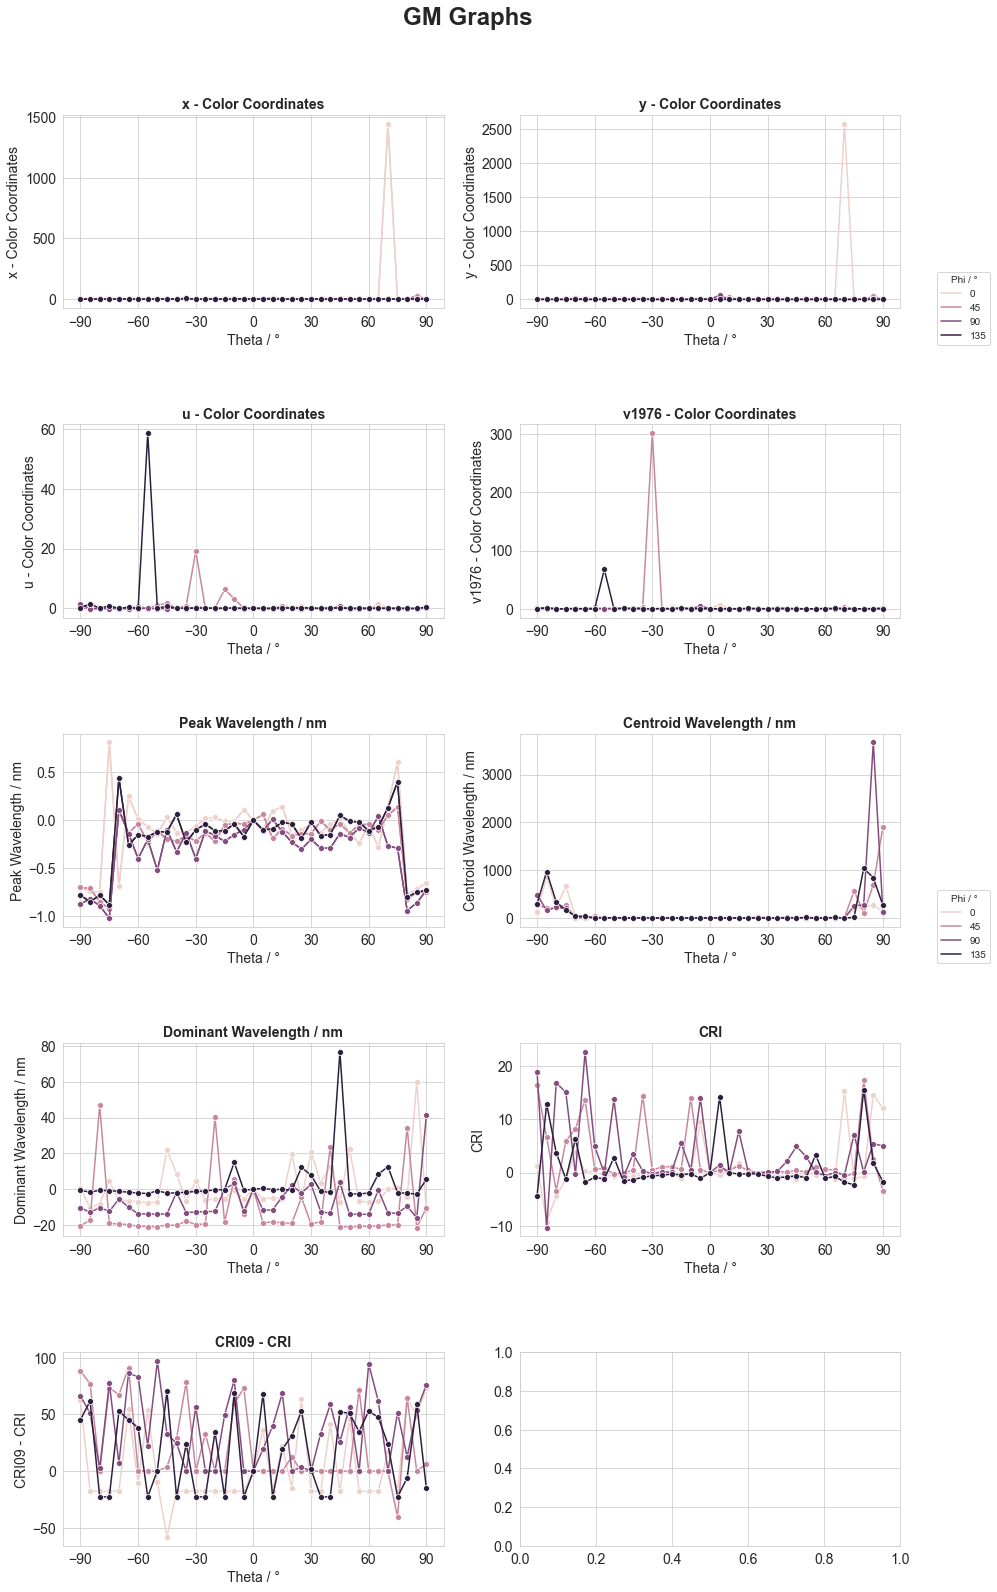

In [55]:
# Rest of the columns

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})

plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('GM Graphs', fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b) in zip(y_n, ax_n):

    c = sns.lineplot(ax=axes[b], x='Theta / °', y=a, hue='Phi / °', data=dfthetaz, ci=False, legend=False, marker='o')

    axes[b].set_title(a, fontweight = 'bold', fontsize = 14)
    c.set(xticks=np.arange(-90, 90+0.01, 30))
 
 # Re-added c1 for legend
c1 = sns.lineplot(ax=axes[0,0], x='Theta / °', y=y1, hue='Phi / °', data=dfthetaz, ci=False, marker='o')

axes[0,0].set_title(y1, fontweight = 'bold', fontsize = 14)
c1.legend(loc='right', bbox_to_anchor=(2.45, 0), ncol=1).set_title('Phi / °') # , prop={'size': 6} <- increase legend size
c1.set_zorder(1)

c5 = sns.lineplot(ax=axes[2,0], x='Theta / °', y=y5, hue='Phi / °', data=dfthetaz, ci=False, marker='o')

axes[2,0].set_title(y5, fontweight = 'bold', fontsize = 14)
c5.legend(loc='right', bbox_to_anchor=(2.45, 0), ncol=1).set_title('Phi / °') # , prop={'size': 6} <- increase legend size
c5.set_zorder(1)

# pass the figure to the custom window
# a = ScrollableWindow(f);

In [56]:
if over == False:
    fname = output_f + '/' + name + '_GM_Graphs_'
    version_png_f(fname)
else:
    f.savefig(output_f + '/' + name + '_GM_Graphs.png')

In [57]:
zero = dfthetaz[dfthetaz['Theta / °'] == 0]
zero = zero[['Phi / °', 'x - Color Coordinates', 'y - Color Coordinates']]
df_cols = ["Phi / °", 
           "delta x",
           "delta y"]
zero.columns = df_cols

In [58]:
new = dfthetaz.merge(zero) # Change if wrong
new['delta x'] = (new['x - Color Coordinates'] - new['delta x']).fillna('-')
new['delta y'] = (new['y - Color Coordinates'] - new['delta y']).fillna('-')
new = new[["Theta / °", "delta x", "delta y"]]
new_df = pd.melt(new, id_vars=['Theta / °'], var_name='Legend', value_name='Δ x, Δ y')

In [59]:
new_df = new_df[new_df['Δ x, Δ y'] < 1000] # Remove datapoints above 1000

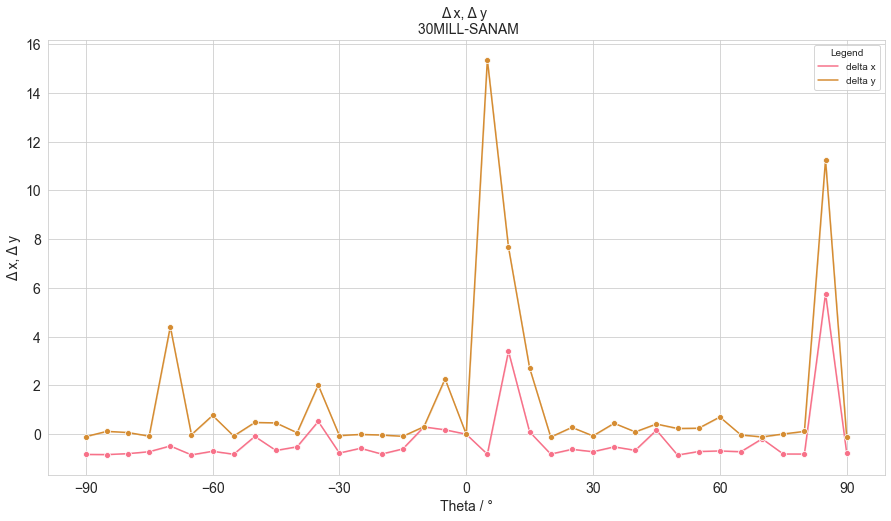

In [60]:
# Plot delta x and y

sns.lineplot(x='Theta / °', y='Δ x, Δ y', hue="Legend", data=new_df, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Δ x, Δ y \n ' + name, fontsize = 14)
if over == False:
    fname = output_f + '/' + name + '_deltaxy_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + name + '_deltaxy.png', bbox_inches='tight');

In [61]:
# Export as Excel Worksheet if needed

if exp == True:
    with pd.ExcelWriter(output_f + '/' + name + '_ALL_output.xlsx') as writer:
        dfs.to_excel(writer, sheet_name='Original Data', index=False)
        dfmaxz.to_excel(writer, sheet_name='Normalized to Theta Max', index=False)
        dfthetaz.to_excel(writer, sheet_name='Normalized to Theta = 0', index=False)
else:
    pass

In [62]:
# View outliers of all the parts

from scipy import stats

cols = list(df.select_dtypes(include=[np.number]).columns)
colsn = cols[4:]

for i in colsn:
    dfsn = df[(np.abs(stats.zscore(df[i])) > 3)]
    if dfsn.empty:
        pass
    else:
        print(i)
        display(dfsn)

Radiometric / W/m²


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
14  30MILL-SANAM-1      15        0        -20                    267   
15  30MILL-SANAM-1      16        0        -15                    267   

    Source current - Currentsource / mA  Current - Currentsource / mA  \
14                                  150                      148.2065   
15                                  150                      149.1489   

    Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
14                     5.658877             0.06745           0.03073   
15                     5.659070             0.06754           0.02910   

    x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
14                0.40555                0.43167                0.22014   
15                0.40890                0.43466                0.22108   

    v1976 - Color Coordinates  Peak Wavelength / nm  Centroid Wavelength / nm  \
14                    0.52721                273.12                    274.71   
15                    0.52877                273.14                    274.71   

    Dominant Wavelength / nm   CRI  CRI09 - CRI  
14                    574.31  71.1        -37.4  
15                    574.49  70.3        -38.0

Photometric / lx


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
10  30MILL-SANAM-1      11        0        -40                    358   
11  30MILL-SANAM-1      12        0        -35                    358   
63  30MILL-SANAM-1      64       45        -40                    288   

    Source current - Currentsource / mA  Current - Currentsource / mA  \
10                                  150                      149.9421   
11                                  150                      149.6201   
63                                  150                      150.0938   

    Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
10                     5.661259             0.05654           0.03602   
11                     5.660737             0.06073           0.03524   
63                     5.643345             0.05690           0.03506   

    x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
10                0.40046                0.43757                0.21502   
11                0.40121                0.43440                0.21656   
63                0.40317                0.43743                0.21667   

    v1976 - Color Coordinates  Peak Wavelength / nm  Centroid Wavelength / nm  \
10                    0.52861                273.06                    274.77   
11                    0.52759                273.08                    274.74   
63                    0.52895                273.07                    274.78   

    Dominant Wavelength / nm   CRI  CRI09 - CRI  
10                    572.78  70.6        -39.1  
11                    573.27  70.9        -38.3  
63                    573.25  70.9        -40.1

x - Color Coordinates


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
32  30MILL-SANAM-3      33        0         70                     20   

    Source current - Currentsource / mA  Current - Currentsource / mA  \
32                                  150                      2.609191   

    Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
32                     5.000188            0.000323         -0.001561   

    x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
32             1448.34031             2576.14969                0.20676   

    v1976 - Color Coordinates  Peak Wavelength / nm  Centroid Wavelength / nm  \
32                    0.82745                273.17                     270.3   

    Dominant Wavelength / nm  CRI  CRI09 - CRI  
32                    571.25 -5.6       -221.9

y - Color Coordinates


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
32  30MILL-SANAM-3      33        0         70                     20   

    Source current - Currentsource / mA  Current - Currentsource / mA  \
32                                  150                      2.609191   

    Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
32                     5.000188            0.000323         -0.001561   

    x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
32             1448.34031             2576.14969                0.20676   

    v1976 - Color Coordinates  Peak Wavelength / nm  Centroid Wavelength / nm  \
32                    0.82745                273.17                     270.3   

    Dominant Wavelength / nm  CRI  CRI09 - CRI  
32                    571.25 -5.6       -221.9

u - Color Coordinates


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
61   30MILL-SANAM-2      62       45        -30                     20   
140  30MILL-SANAM-5     141      135        -55                     20   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
61                                   150                      4.131938   
140                                  150                      2.203128   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
61                      4.998791            0.002339          0.000457   
140                     5.000229            0.000683          0.000155   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
61                -0.03708               -0.25682               19.40386   
140               -0.73200               -0.37614               58.91574   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
61                   302.36909                273.74   
140                   68.11685                271.78   

     Centroid Wavelength / nm  Dominant Wavelength / nm  CRI  CRI09 - CRI  
61                     273.23                    460.47  0.0          0.0  
140                    272.35                    482.57  0.0          0.0

v1976 - Color Coordinates


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
61   30MILL-SANAM-2      62       45        -30                     20   
140  30MILL-SANAM-5     141      135        -55                     20   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
61                                   150                      4.131938   
140                                  150                      2.203128   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
61                      4.998791            0.002339          0.000457   
140                     5.000229            0.000683          0.000155   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
61                -0.03708               -0.25682               19.40386   
140               -0.73200               -0.37614               58.91574   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
61                   302.36909                273.74   
140                   68.11685                271.78   

     Centroid Wavelength / nm  Dominant Wavelength / nm  CRI  CRI09 - CRI  
61                     273.23                    460.47  0.0          0.0  
140                    272.35                    482.57  0.0          0.0

Centroid Wavelength / nm


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
1    30MILL-SANAM-2       2        0        -85                     20   
35   30MILL-SANAM-2      36        0         85                     20   
37   30MILL-SANAM-2      38       45         90                     20   
109  30MILL-SANAM-2     110       90         85                     20   
113  30MILL-SANAM-2     114      135         80                     20   
34   30MILL-SANAM-3      35        0         80                     20   
113  30MILL-SANAM-3     114      135         80                     20   
33   30MILL-SANAM-4      34        0         75                     20   
109  30MILL-SANAM-5     110       90         85                     20   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
1                                    150                      3.573718   
35                                   150                      3.471885   
37                                   150                      4.030651   
109                                  150                      4.132057   
113                                  150                      3.725712   
34                                   150                      2.964608   
113                                  150                      2.710685   
33                                   150                      2.355387   
109                                  150                      2.101629   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
1                       4.999560       -1.332000e-06          0.000453   
35                      4.998083       -1.209000e-07         -0.001997   
37                      4.999236       -5.803000e-06         -0.002282   
109                     4.999520       -5.395000e-06         -0.001956   
113                     4.998731       -1.336000e-05         -0.001430   
34                      5.000411        1.414000e-05         -0.003562   
113                     4.999338        1.117000e-05         -0.002174   
33                      5.000391        5.439000e-06         -0.004238   
109                     4.999560        2.361000e-06         -0.001443   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
1                 -0.21323                0.34813               -0.11217   
35                 0.24886                0.31412                0.15872   
37                 0.35967                0.58557                0.15457   
109                0.22352                0.20690                0.17755   
113                0.21659                0.44822                0.10904   
34                 0.28101                0.34148                0.17198   
113                0.27853                0.29357                0.18675   
33                 0.39225                0.38119                0.23108   
109                0.19954                0.43965                0.10133   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
1                      0.41204                223.92   
35                     0.45077                227.43   
37                     0.56622                220.34   
109                    0.36977                226.80   
113                    0.50771                222.18   
34                     0.47024                219.00   
113                    0.44288                222.50   
33                     0.50528                271.68   
109                    0.50235                220.00   

     Centroid Wavelength / nm  Dominant Wavelength / nm   CRI  CRI09 - CRI  
1                    -3939.55                    492.06   0.0          0.0  
35                   -5166.82                    488.76  36.8          8.5  
37                    2180.21                    558.81   7.2        -19.2  
109                   2027.66                    473.94   0.0          0.0  
113                   1315.62                    505.14  21.1         16.6  
34  

CRI


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
27   30MILL-SANAM-2      28        0         45                     20   
30   30MILL-SANAM-2      31        0         60                     20   
60   30MILL-SANAM-2      61       45        -25                     20   
28   30MILL-SANAM-3      29        0         50                     20   
62   30MILL-SANAM-3      63       45        -35                     20   
138  30MILL-SANAM-3     139      135        -45                     20   
1    30MILL-SANAM-4       2        0        -85                     20   
10   30MILL-SANAM-4      11        0        -40                     20   
62   30MILL-SANAM-5      63       45        -35                     20   
114  30MILL-SANAM-5     115      135         75                     20   
134  30MILL-SANAM-5     135      135        -25                     20   
147  30MILL-SANAM-5     148      135        -90                     20   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
27                                   150                      4.132216   
30                                   150                      3.472229   
60                                   150                      4.030651   
28                                   150                      2.558403   
62                                   150                      2.659841   
138                                  150                      2.355260   
1                                    150                      2.304651   
10                                   150                      2.710995   
62                                   150                      1.949256   
114                                  150                      2.050753   
134                                  150                      2.406225   
147                                  150                      2.304701   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
27                      4.999884            0.001909          0.000432   
30                      4.999296            0.001099          0.002186   
60                      4.999945            0.002417         -0.001083   
28                      4.999135            0.000998         -0.000606   
62                      4.999622            0.001517         -0.002665   
138                     4.998771            0.001229         -0.000328   
1                       4.999621           -0.000053         -0.000380   
10                      5.000592            0.001081          0.000282   
62                      4.999197            0.001089          0.002121   
114                     4.999055            0.000061         -0.001452   
134                     5.000411            0.001200          0.000360   
147                     4.999803            0.000041         -0.000197   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
27                -0.31092                0.93226               -0.08398   
30                 0.46483                0.54018                0.21740   
60                 0.46819                0.52503                0.22391   
28                -0.29427                1.43571               -0.05654   
62                 0.35670                0.63395                0.14421   
138                0.36798                0.15995                0.35185   
1                  0.34332                0.09552                0.39694   
10                 0.51239                0.28774                0.37758   
62                 0.48486                0.51594                0.23589   
114                0.43396                0.53041                0.20429   
134                0.30607                0.09029                0.35267   
147                0.33847                0.10078                0.38328   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
27                     0.56657                273.89   
30                   

CRI09 - CRI


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
97  30MILL-SANAM-5      98       90         25                     20   

    Source current - Currentsource / mA  Current - Currentsource / mA  \
97                                  150                      2.406328   

    Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
97                     5.000471            0.001271          0.001358   

    x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
97               -0.01105               -0.88178                0.00585   

    v1976 - Color Coordinates  Peak Wavelength / nm  Centroid Wavelength / nm  \
97                    1.04984                 271.3                    286.01   

    Dominant Wavelength / nm  CRI  CRI09 - CRI  
97                   -564.69 -8.0     -64885.5

# Dropdown Box for Selecting Specific Part

In [63]:
fn = list(df['Filename'].unique())

root = ThemedTk(theme='arc')
root.title("GUI for Selecting Specific Part")

Label(root, text = "Select Specific Part").grid(row = 1, sticky = W)

e7 = StringVar(root)
e7.set(fn[0])
drop = ttk.OptionMenu(root,e7,*fn)

drop.grid(row = 2)
    
def kill():
    global h
    h = e7.get()
    root.destroy()
    
ttk.Button(root, text = "Submit",
        command = kill).grid(row = 50)

root.mainloop()
    
dfn = df[df['Filename'] == h]

In [64]:
# Check if source current is close to actual current

import ctypes  # An included library with Python install.
def Mbox(title, text, style):
    return ctypes.windll.user32.MessageBoxW(0, text, title, style)
    
diff = abs(dfn['Source current - Currentsource / mA'].iloc[0] - dfn['Current - Currentsource / mA'].mean())

if diff <= 0.5:
    pass
else:
    Mbox('Warning!', 'Mean current and source current difference is larger than 0.5', 0)

In [65]:
# View outliers of the specific part

from scipy import stats

cols = list(dfn.select_dtypes(include=[np.number]).columns)
colsn = cols[4:]

for i in colsn:
    dfsn = dfn[(np.abs(stats.zscore(dfn[i])) > 3)]
    if dfsn.empty:
        pass
    else:
        print(i)
        display(dfsn)
        
dfn = dfn.drop(['Filename'], axis=1)

x - Color Coordinates


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
0   30MILL-SANAM-1       1        0        -90                   1000   
36  30MILL-SANAM-1      37        0         90                   1000   
37  30MILL-SANAM-1      38       45         90                   1000   
72  30MILL-SANAM-1      73       45        -85                   1000   

    Source current - Currentsource / mA  Current - Currentsource / mA  \
0                                   150                      150.5700   
36                                  150                      148.3583   
37                                  150                      149.7817   
72                                  150                      150.2579   

    Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
0                      5.663534            0.000124          0.000405   
36                     5.643701            0.000101          0.000270   
37                     5.645721            0.000100          0.000223   
72                     5.643719            0.000140          0.000279   

    x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
0                 0.45135                0.48646                0.22753   
36                0.35679                0.38874                0.20531   
37                0.47299                0.42580                0.26411   
72                0.45218                0.47033                0.23370   

    v1976 - Color Coordinates  Peak Wavelength / nm  Centroid Wavelength / nm  \
0                     0.55176                273.17                    283.49   
36                    0.50331                273.22                    278.89   
37                    0.53495                273.21                    275.77   
72                    0.54692                273.25                    277.96   

    Dominant Wavelength / nm   CRI  CRI09 - CRI  
0                     574.88  65.1        -48.3  
36                    568.31  77.1         18.5  
37                    583.21  67.0        -54.3  
72                    576.31  67.0        -22.7

y - Color Coordinates


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
0    30MILL-SANAM-1       1        0        -90                   1000   
36   30MILL-SANAM-1      37        0         90                   1000   
38   30MILL-SANAM-1      39       45         85                   1000   
110  30MILL-SANAM-1     111       90         90                   1000   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
0                                    150                      150.5700   
36                                   150                      148.3583   
38                                   150                      149.6250   
110                                  150                      148.9886   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
0                       5.663534            0.000124          0.000405   
36                      5.643701            0.000101          0.000270   
38                      5.644302            0.000326          0.000672   
110                     5.640697            0.000105          0.000249   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
0                  0.45135                0.48646                0.22753   
36                 0.35679                0.38874                0.20531   
38                 0.43750                0.50590                0.21353   
110                0.38236                0.40598                0.21520   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
0                      0.55176                273.17   
36                     0.50331                273.22   
38                     0.55554                273.21   
110                    0.51411                273.33   

     Centroid Wavelength / nm  Dominant Wavelength / nm   CRI  CRI09 - CRI  
0                      283.49                    574.88  65.1        -48.3  
36                     278.89                    568.31  77.1         18.5  
38                     276.28                    572.05  62.8        -53.1  
110                    278.90                    573.32  75.3        -37.4

u - Color Coordinates


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
37   30MILL-SANAM-1      38       45         90                   1000   
111  30MILL-SANAM-1     112      135         90                   1000   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
37                                   150                      149.7817   
111                                  150                      150.1061   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
37                      5.645721            0.000100          0.000223   
111                     5.642685            0.000103          0.000260   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
37                 0.47299                0.42580                0.26411   
111                0.44064                0.42074                0.24591   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
37                     0.53495                273.21   
111                    0.52830                273.21   

     Centroid Wavelength / nm  Dominant Wavelength / nm   CRI  CRI09 - CRI  
37                     275.77                    583.21  67.0        -54.3  
111                    278.54                    580.62  69.9          7.6

v1976 - Color Coordinates


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
0    30MILL-SANAM-1       1        0        -90                   1000   
36   30MILL-SANAM-1      37        0         90                   1000   
38   30MILL-SANAM-1      39       45         85                   1000   
72   30MILL-SANAM-1      73       45        -85                   1000   
110  30MILL-SANAM-1     111       90         90                   1000   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
0                                    150                      150.5700   
36                                   150                      148.3583   
38                                   150                      149.6250   
72                                   150                      150.2579   
110                                  150                      148.9886   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
0                       5.663534            0.000124          0.000405   
36                      5.643701            0.000101          0.000270   
38                      5.644302            0.000326          0.000672   
72                      5.643719            0.000140          0.000279   
110                     5.640697            0.000105          0.000249   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
0                  0.45135                0.48646                0.22753   
36                 0.35679                0.38874                0.20531   
38                 0.43750                0.50590                0.21353   
72                 0.45218                0.47033                0.23370   
110                0.38236                0.40598                0.21520   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
0                      0.55176                273.17   
36                     0.50331                273.22   
38                     0.55554                273.21   
72                     0.54692                273.25   
110                    0.51411                273.33   

     Centroid Wavelength / nm  Dominant Wavelength / nm   CRI  CRI09 - CRI  
0                      283.49                    574.88  65.1        -48.3  
36                     278.89                    568.31  77.1         18.5  
38                     276.28                    572.05  62.8        -53.1  
72                     277.96                    576.31  67.0        -22.7  
110                    278.90                    573.32  75.3        -37.4

Peak Wavelength / nm


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
110  30MILL-SANAM-1     111       90         90                   1000   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
110                                  150                      148.9886   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
110                     5.640697            0.000105          0.000249   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
110                0.38236                0.40598                 0.2152   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
110                    0.51411                273.33   

     Centroid Wavelength / nm  Dominant Wavelength / nm   CRI  CRI09 - CRI  
110                     278.9                    573.32  75.3        -37.4

Centroid Wavelength / nm


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
0    30MILL-SANAM-1       1        0        -90                   1000   
1    30MILL-SANAM-1       2        0        -85                   1000   
36   30MILL-SANAM-1      37        0         90                   1000   
110  30MILL-SANAM-1     111       90         90                   1000   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
0                                    150                      150.5700   
1                                    150                      149.3142   
36                                   150                      148.3583   
110                                  150                      148.9886   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
0                       5.663534            0.000124          0.000405   
1                       5.663746            0.000136          0.000373   
36                      5.643701            0.000101          0.000270   
110                     5.640697            0.000105          0.000249   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
0                  0.45135                0.48646                0.22753   
1                  0.39363                0.45973                0.20370   
36                 0.35679                0.38874                0.20531   
110                0.38236                0.40598                0.21520   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
0                      0.55176                273.17   
1                      0.53530                273.13   
36                     0.50331                273.22   
110                    0.51411                273.33   

     Centroid Wavelength / nm  Dominant Wavelength / nm   CRI  CRI09 - CRI  
0                      283.49                    574.88  65.1        -48.3  
1                      281.33                    569.50  62.1        -86.2  
36                     278.89                    568.31  77.1         18.5  
110                    278.90                    573.32  75.3        -37.4

Dominant Wavelength / nm


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
36   30MILL-SANAM-1      37        0         90                   1000   
37   30MILL-SANAM-1      38       45         90                   1000   
111  30MILL-SANAM-1     112      135         90                   1000   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
36                                   150                      148.3583   
37                                   150                      149.7817   
111                                  150                      150.1061   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
36                      5.643701            0.000101          0.000270   
37                      5.645721            0.000100          0.000223   
111                     5.642685            0.000103          0.000260   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
36                 0.35679                0.38874                0.20531   
37                 0.47299                0.42580                0.26411   
111                0.44064                0.42074                0.24591   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
36                     0.50331                273.22   
37                     0.53495                273.21   
111                    0.52830                273.21   

     Centroid Wavelength / nm  Dominant Wavelength / nm   CRI  CRI09 - CRI  
36                     278.89                    568.31  77.1         18.5  
37                     275.77                    583.21  67.0        -54.3  
111                    278.54                    580.62  69.9          7.6

CRI


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
1   30MILL-SANAM-1       2        0        -85                   1000   
38  30MILL-SANAM-1      39       45         85                   1000   
73  30MILL-SANAM-1      74       45        -90                   1000   
75  30MILL-SANAM-1      76       90        -85                   1000   

    Source current - Currentsource / mA  Current - Currentsource / mA  \
1                                   150                      149.3142   
38                                  150                      149.6250   
73                                  150                      148.2114   
75                                  150                      149.6250   

    Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
1                      5.663746            0.000136          0.000373   
38                     5.644302            0.000326          0.000672   
73                     5.642038            0.000120          0.000357   
75                     5.643188            0.000139          0.000309   

    x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
1                 0.39363                0.45973                0.20370   
38                0.43750                0.50590                0.21353   
73                0.41234                0.45369                0.21646   
75                0.41643                0.45310                0.21905   

    v1976 - Color Coordinates  Peak Wavelength / nm  Centroid Wavelength / nm  \
1                     0.53530                273.13                    281.33   
38                    0.55554                273.21                    276.28   
73                    0.53588                273.26                    276.01   
75                    0.53626                273.24                    274.46   

    Dominant Wavelength / nm   CRI  CRI09 - CRI  
1                     569.50  62.1        -86.2  
38                    572.05  62.8        -53.1  
73                    573.00  54.3       -107.7  
75                    573.64  60.6        -90.3

CRI09 - CRI


Filename  Number  Phi / °  Theta / °  Integration Time / ms  \
1    30MILL-SANAM-1       2        0        -85                   1000   
36   30MILL-SANAM-1      37        0         90                   1000   
73   30MILL-SANAM-1      74       45        -90                   1000   
75   30MILL-SANAM-1      76       90        -85                   1000   
111  30MILL-SANAM-1     112      135         90                   1000   

     Source current - Currentsource / mA  Current - Currentsource / mA  \
1                                    150                      149.3142   
36                                   150                      148.3583   
73                                   150                      148.2114   
75                                   150                      149.6250   
111                                  150                      150.1061   

     Voltage - Currentsource / V  Radiometric / W/m²  Photometric / lx  \
1                       5.663746            0.000136          0.000373   
36                      5.643701            0.000101          0.000270   
73                      5.642038            0.000120          0.000357   
75                      5.643188            0.000139          0.000309   
111                     5.642685            0.000103          0.000260   

     x - Color Coordinates  y - Color Coordinates  u - Color Coordinates  \
1                  0.39363                0.45973                0.20370   
36                 0.35679                0.38874                0.20531   
73                 0.41234                0.45369                0.21646   
75                 0.41643                0.45310                0.21905   
111                0.44064                0.42074                0.24591   

     v1976 - Color Coordinates  Peak Wavelength / nm  \
1                      0.53530                273.13   
36                     0.50331                273.22   
73                     0.53588                273.26   
75                     0.53626                273.24   
111                    0.52830                273.21   

     Centroid Wavelength / nm  Dominant Wavelength / nm   CRI  CRI09 - CRI  
1                      281.33                    569.50  62.1        -86.2  
36                     278.89                    568.31  77.1         18.5  
73                     276.01                    573.00  54.3       -107.7  
75                     274.46                    573.64  60.6        -90.3  
111                    278.54                    580.62  69.9          7.6

In [66]:
dfs = dfn.groupby(['Phi / °', 'Theta / °']).max().reset_index()

# Calculations (one df for max normalization & another for theta = 0 normalization)

dfmax = dfs.groupby('Phi / °').max().reset_index()
dftheta = dfs[dfs['Theta / °'] == 0]

# Columns besides radiometric & photometric are normalized to theta = 0
test = (dfs.set_index('Phi / °').iloc[:,8:17]-dftheta.set_index('Phi / °').iloc[:,8:17]
        .reindex(dfs['Phi / °'])).dropna(axis=0).reset_index()
test2 = (dfs.set_index('Phi / °').iloc[:,[6,7]] / dfmax.set_index('Phi / °').iloc[:,[6,7]]
                .reindex(dfs['Phi / °'])).dropna(axis=0).reset_index()
test2.iloc[:,1:] = test2.iloc[:,1:].mul(100)

# Max normalized for radio & photo, rest are theta normalized
dfmaxz = pd.concat([dfs.iloc[:,0:7], test2.iloc[:,1:], test.iloc[:,1:]], axis=1)

# All theta normalized
test2 = (dfs.set_index('Phi / °').iloc[:,[6,7]] / dftheta.set_index('Phi / °').iloc[:,[6,7]]
                .reindex(dfs['Phi / °'])).dropna(axis=0).reset_index()
test2.iloc[:,1:] = test2.iloc[:,1:].mul(100)
dfthetaz = pd.concat([dfs.iloc[:,0:7], test2.iloc[:,1:], test.iloc[:,1:]], axis=1)

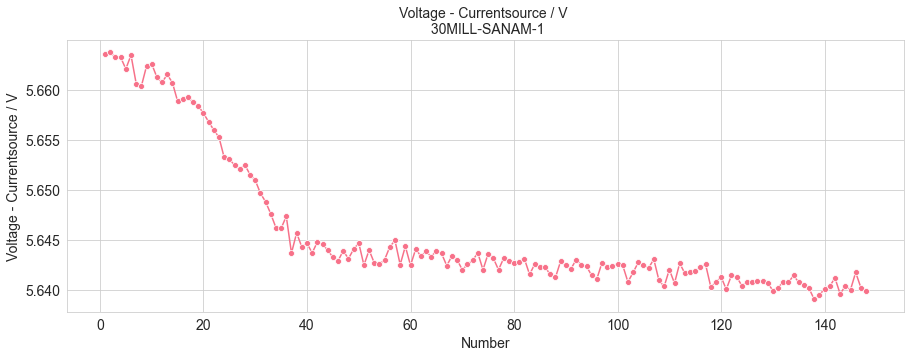

In [67]:
# Number vs Voltage
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,5

sns.set_style("whitegrid")
sns.lineplot(x='Number', y='Voltage - Currentsource / V', data=dfs, ci=False, marker = 'o')
plt.title('Voltage - Currentsource / V \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Voltage_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Voltage.png', bbox_inches='tight');

# Radiometric - By Phi

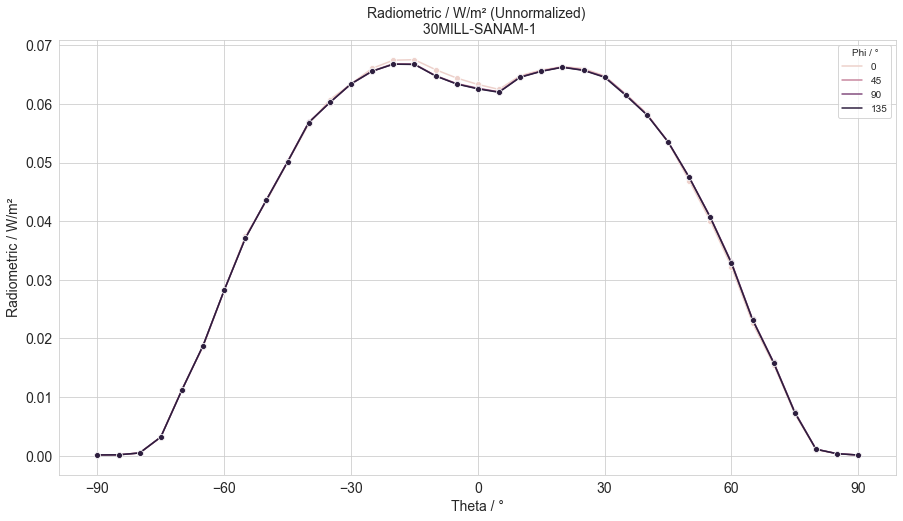

In [68]:
# Theta vs Radiometric by Phi (Unnormalized)

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Phi / °', data=dfs, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Radiometric / W/m² (Unnormalized) \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Unnorm_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Unnorm.png', bbox_inches='tight');

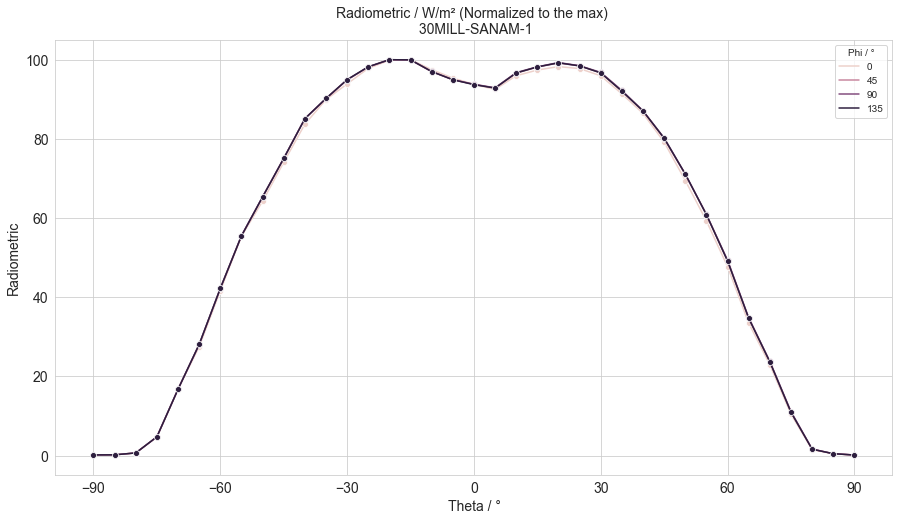

In [69]:
# Theta vs Radiometric by Phi (Normalized to the max)

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Phi / °', data=dfmaxz, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max) \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Max_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Max.png', bbox_inches='tight');

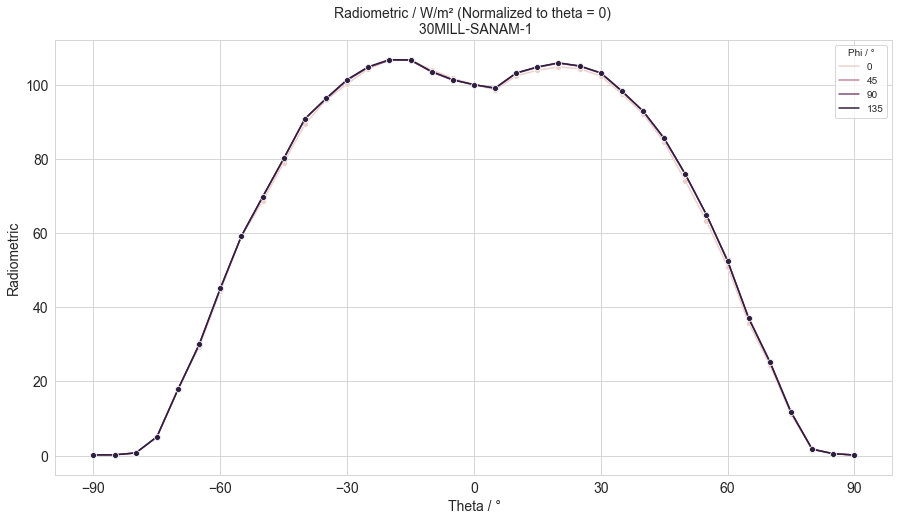

In [70]:
# Theta vs Radiometric by Phi (Normalized to theta = 0)

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Phi / °', data=dfthetaz, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0) \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Theta0_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Theta0.png', bbox_inches='tight');

# Radiometric - Averaged by Theta

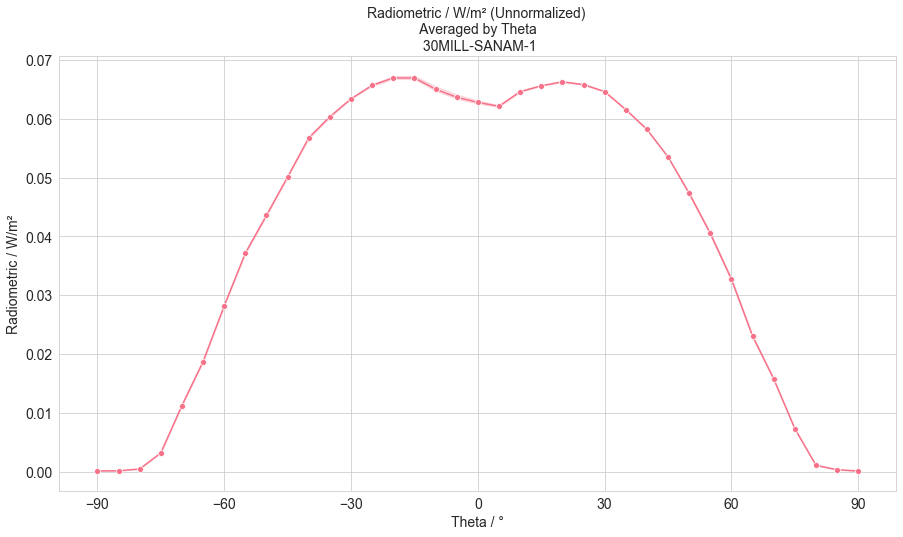

In [71]:
# Theta vs Radiometric by Phi (Unnormalized) - Averaged by Theta

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', data=dfs, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Radiometric / W/m² (Unnormalized) \n Averaged by Theta \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Unnorm_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Unnorm_Avg.png', bbox_inches='tight');

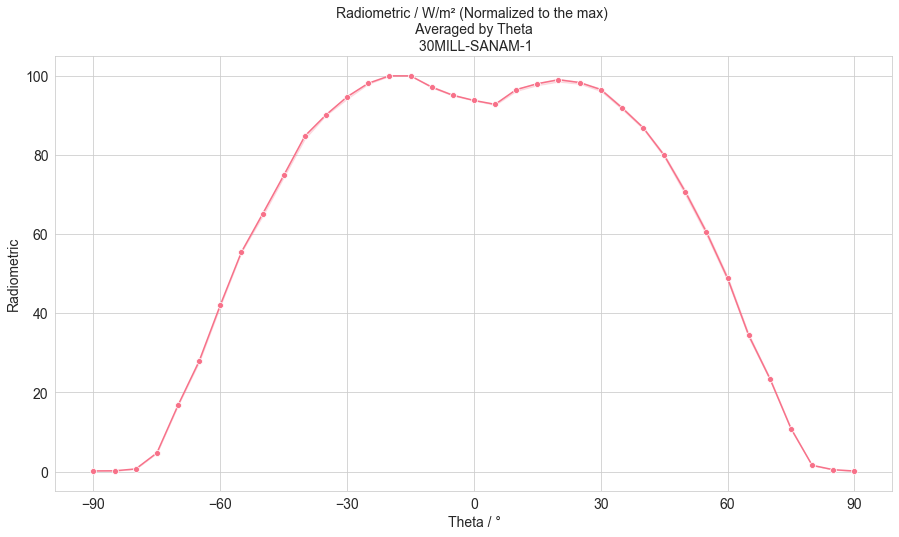

In [72]:
# Theta vs Radiometric by Phi (Normalized to the max) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', data=dfmaxz, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max) \n Averaged by Theta \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Max_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Max_Avg.png', bbox_inches='tight');

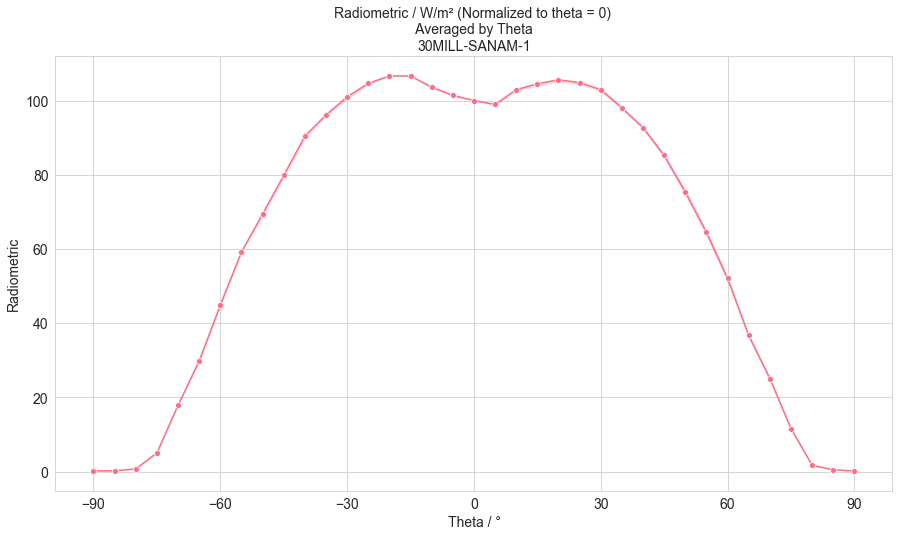

In [73]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', data=dfthetaz, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0) \n Averaged by Theta \n' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Theta0_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Theta0_Avg.png', bbox_inches='tight');

# Radiometric - Theta Absolute Values

In [74]:
dfs['Theta_Abs'] = dfs['Theta / °'].abs()
dfmaxz['Theta_Abs'] = dfmaxz['Theta / °'].abs()
dfthetaz['Theta_Abs'] = dfthetaz['Theta / °'].abs()

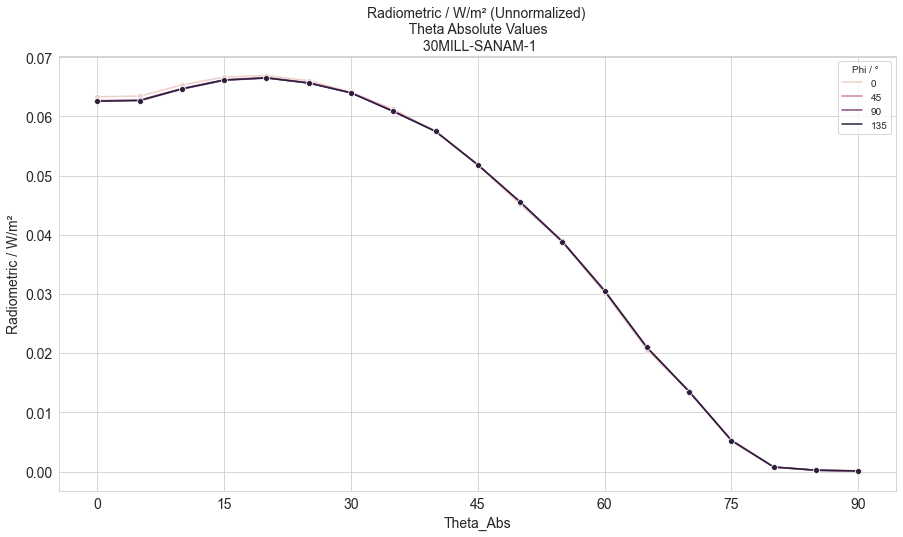

In [75]:
# Theta vs Radiometric by Phi (Unnormalized) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Phi / °', data=dfs, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.title('Radiometric / W/m² (Unnormalized) \n Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Unnorm_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Unnorm_Abs.png', bbox_inches='tight');

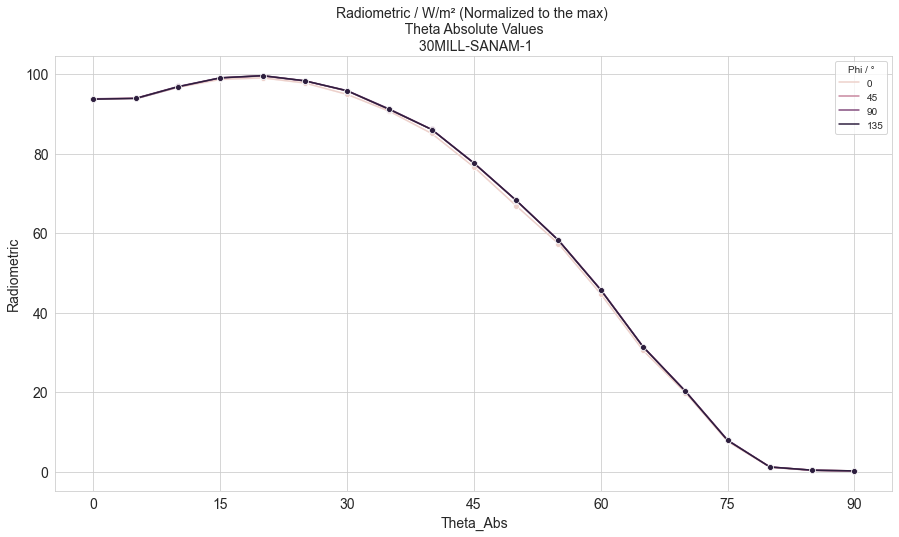

In [76]:
# Theta vs Radiometric by Phi (Normalized to the max) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Phi / °', data=dfmaxz, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max) \n Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Max_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Max_Abs.png', bbox_inches='tight');

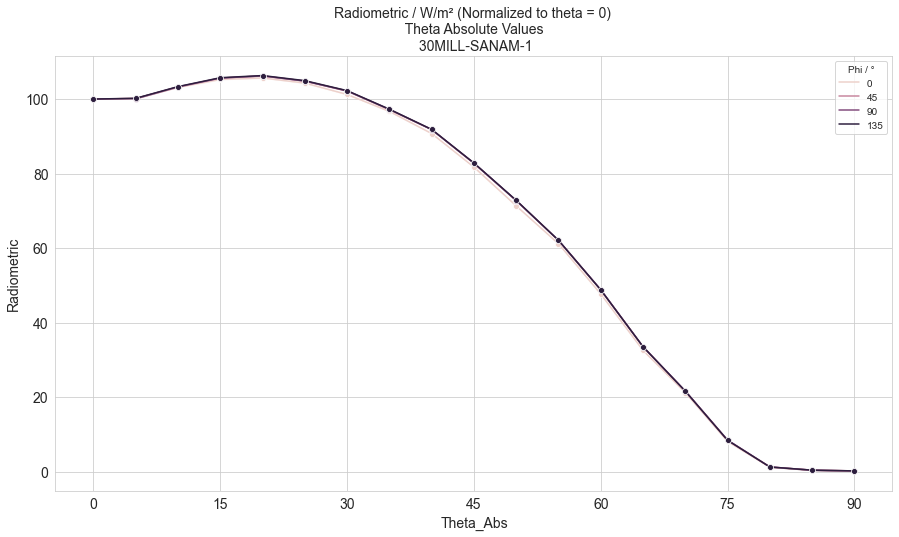

In [77]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Phi / °', data=dfthetaz, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0) \n Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Theta0_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Theta0_Abs.png', bbox_inches='tight');

# Radiometric - Averaged by Theta Absolute Values

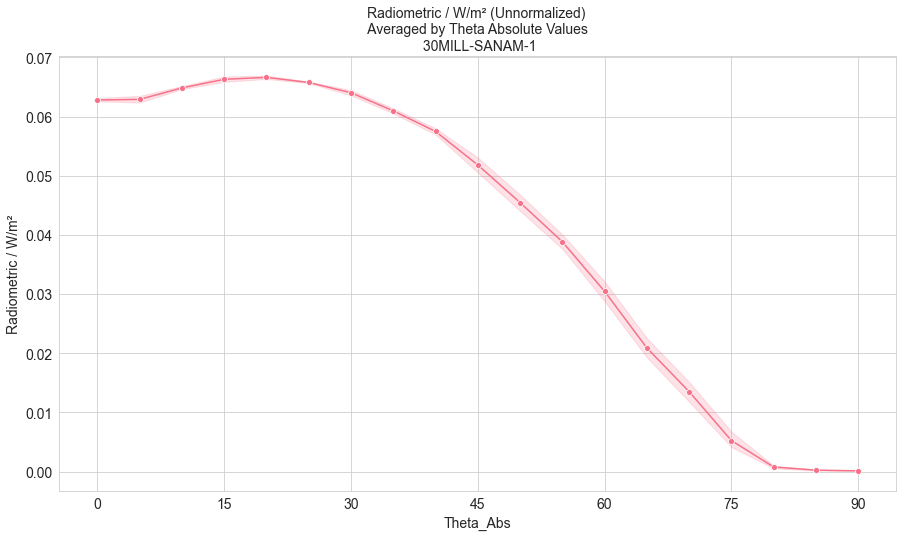

In [78]:
# Theta vs Radiometric by Phi (Unnormalized) - Averaged by Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', data=dfs, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.title('Radiometric / W/m² (Unnormalized) \n Averaged by Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Unnorm_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Unnorm_AvgAbs.png', bbox_inches='tight');

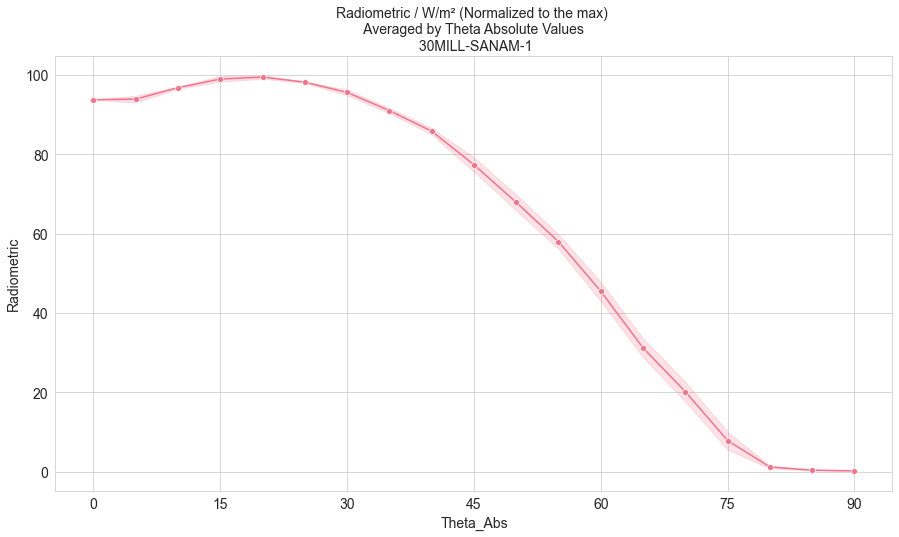

In [79]:
# Theta vs Radiometric by Phi (Normalized to the max) - Averaged by Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', data=dfmaxz, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max) \n Averaged by Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Max_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Max_AvgAbs.png', bbox_inches='tight');

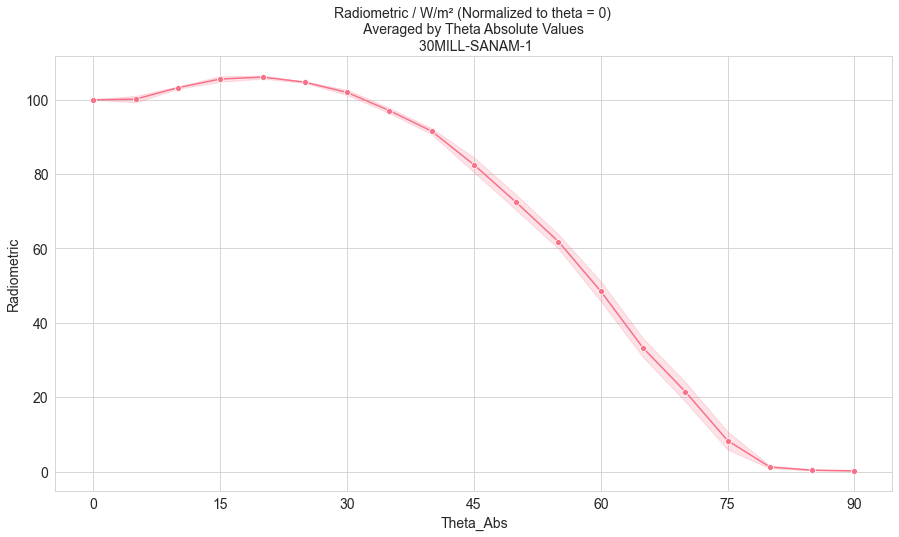

In [80]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Averaged by Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', data=dfthetaz, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0) \n Averaged by Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Radio_Theta0_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Radio_Theta0_AvgAbs.png', bbox_inches='tight');

# Photometric - By Phi

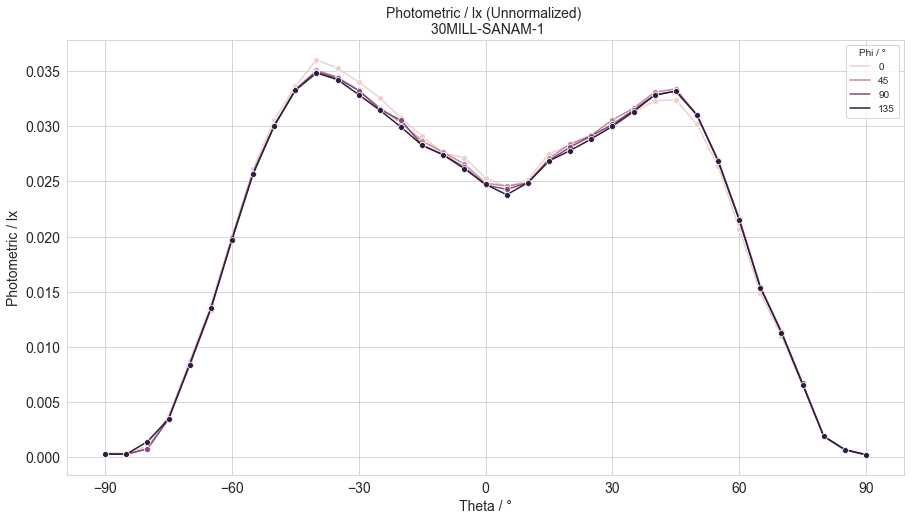

In [81]:
# Theta vs Photometric by Phi (Unnormalized)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Phi / °', data=dfs, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Photometric / lx (Unnormalized) \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Unnorm_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Unnorm.png', bbox_inches='tight');

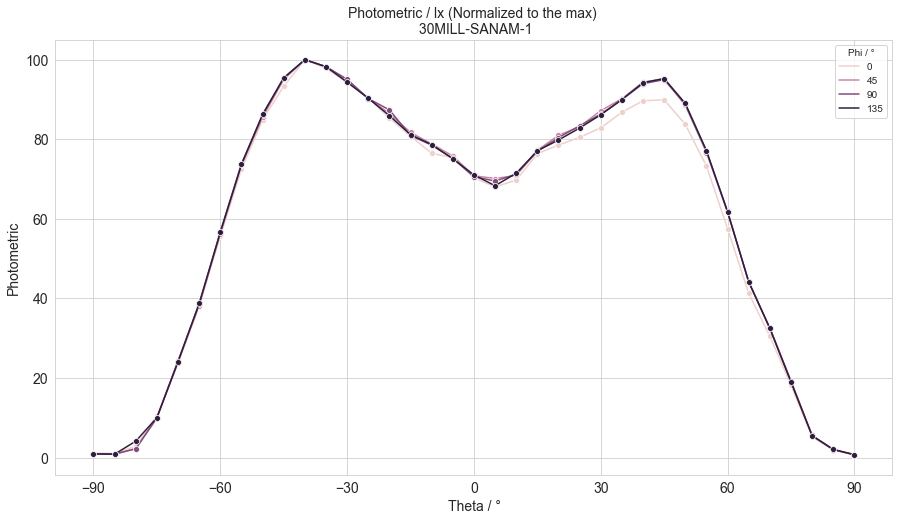

In [82]:
# Theta vs Photometric by Phi (Normalized to the max)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Phi / °', data=dfmaxz, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max) \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Max_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Max.png', bbox_inches='tight');

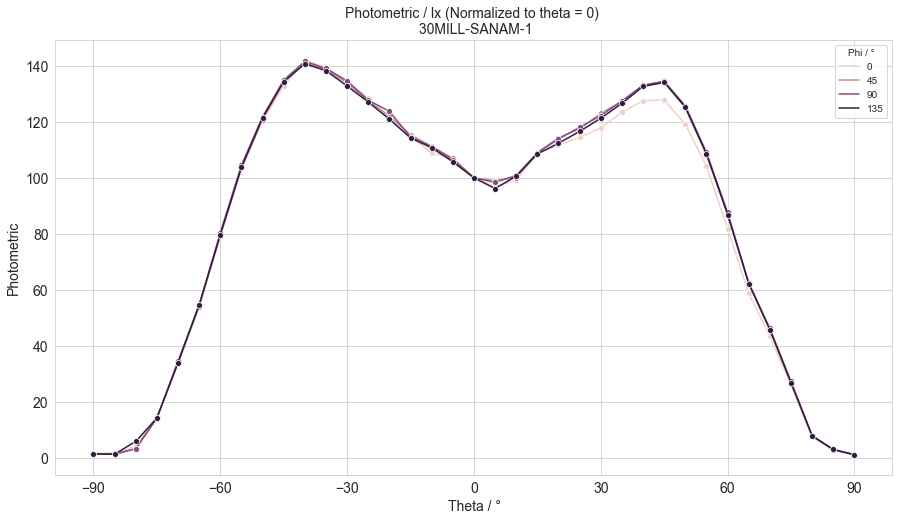

In [83]:
# Theta vs Photometric by Phi (Normalized to theta = 0)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Phi / °', data=dfthetaz, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0) \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Theta0_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Theta0.png', bbox_inches='tight');

# Photometric - Averaged by Theta

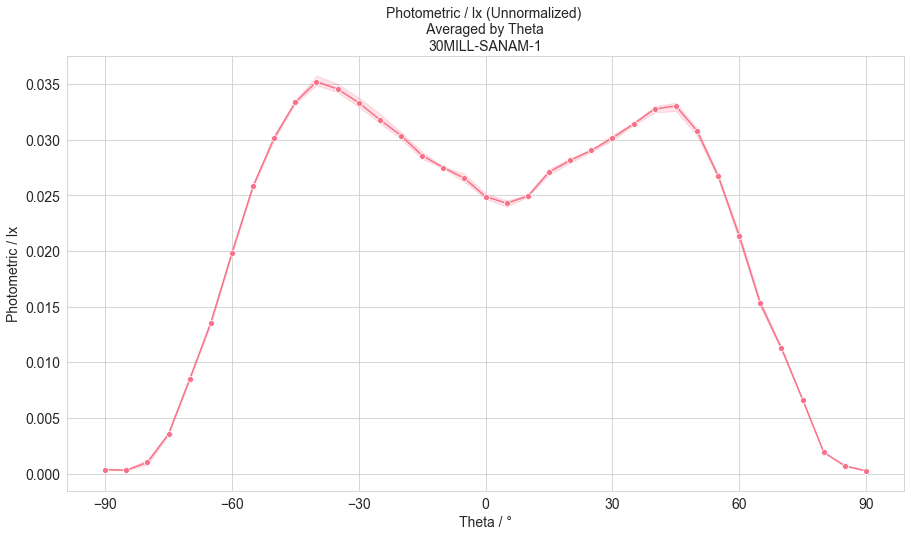

In [84]:
# Theta vs Photometric by Phi (Unnormalized) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Photometric / lx', data=dfs, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Photometric / lx (Unnormalized) \n Averaged by Theta \n' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Unnorm_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Unnorm_Avg.png', bbox_inches='tight');

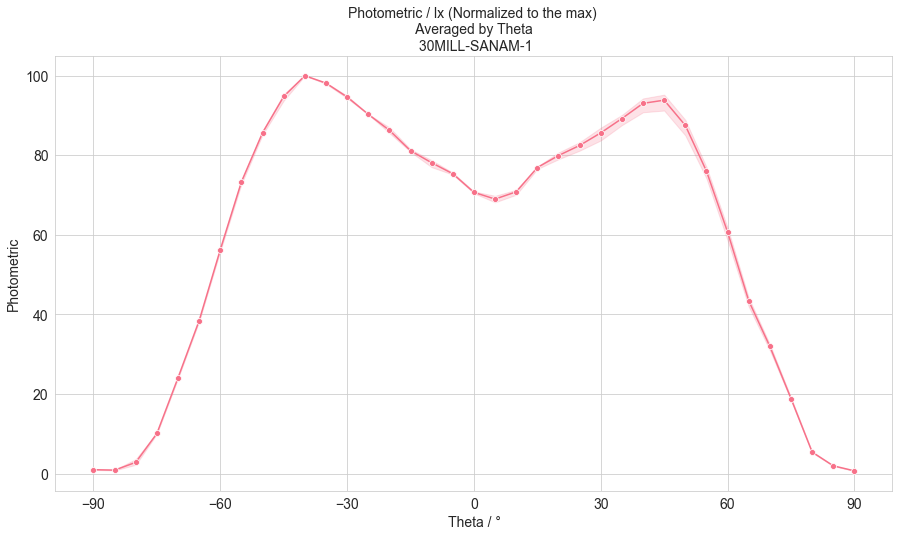

In [85]:
# Theta vs Photometric by Phi (Normalized to the max) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Photometric / lx', data=dfmaxz, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max) \n Averaged by Theta \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Max_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Max_Avg.png', bbox_inches='tight');

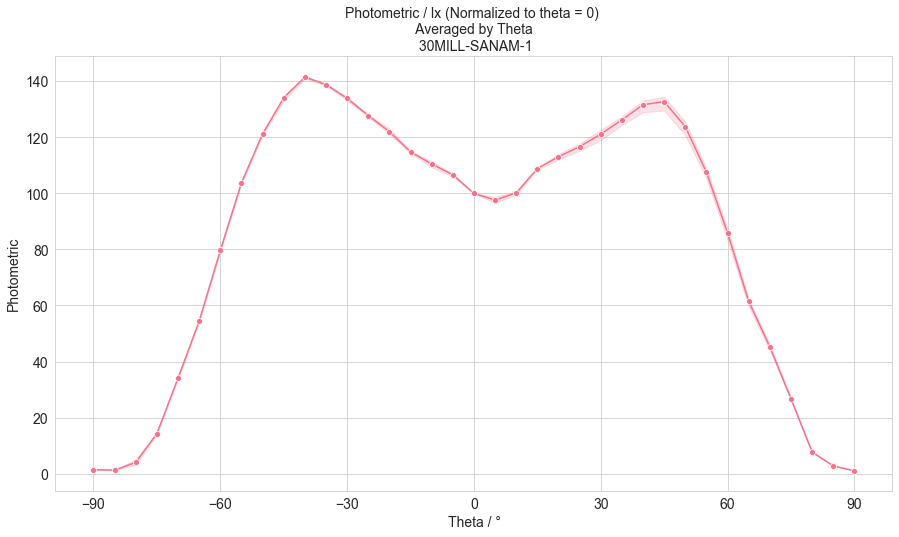

In [86]:
# Theta vs Photometric by Phi (Normalized to theta = 0) - Averaged by Theta

sns.lineplot(x='Theta / °', y='Photometric / lx', data=dfthetaz, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0) \n Averaged by Theta \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Theta0_Avg_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Theta0_Avg.png', bbox_inches='tight');

# Photometric - Theta Absolute Values

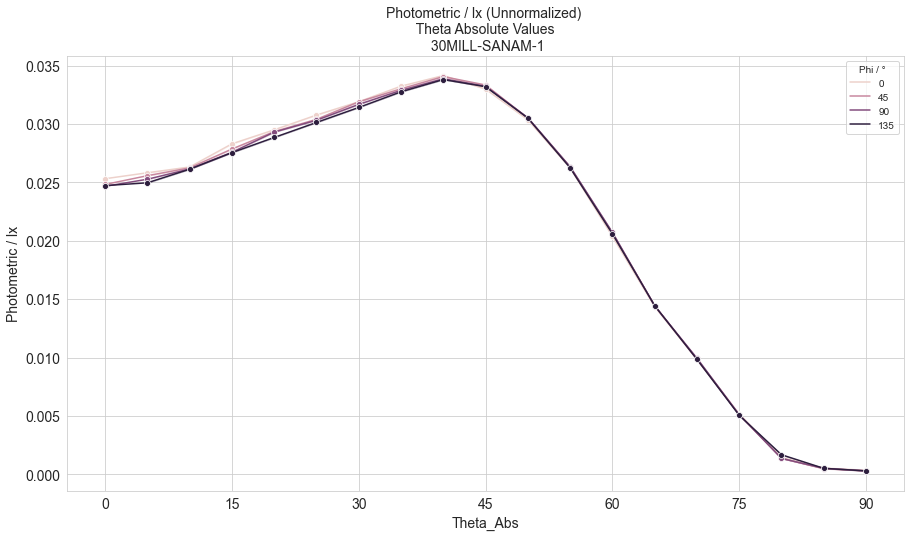

In [87]:
# Theta vs Photometric by Phi (Unnormalized) - Theta Absolute Values

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Phi / °', data=dfs, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.title('Photometric / lx (Unnormalized) \n Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Unnorm_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Unnorm_Abs.png', bbox_inches='tight');

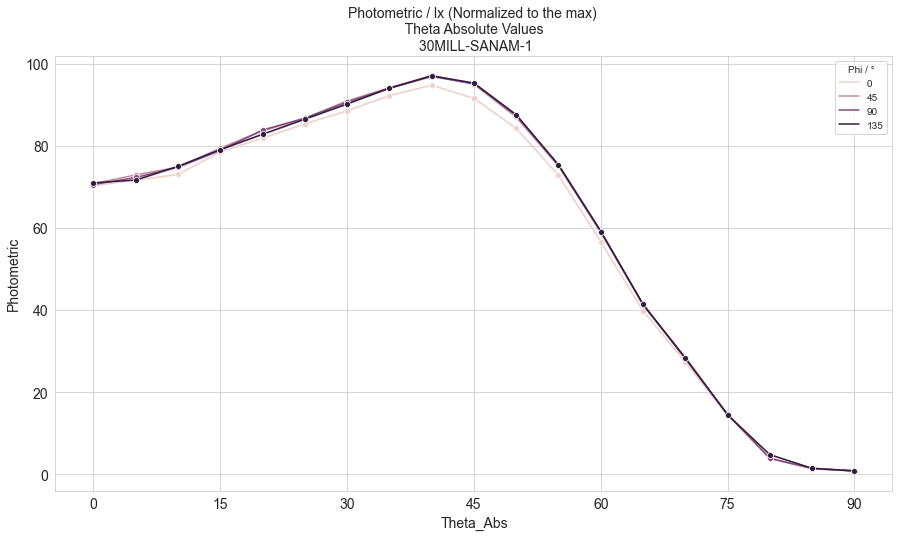

In [88]:
# Theta vs Photometric by Phi (Normalized to the max) - Theta Absolute Values

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Phi / °', data=dfmaxz, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max) \n Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Max_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Max_Abs.png', bbox_inches='tight');

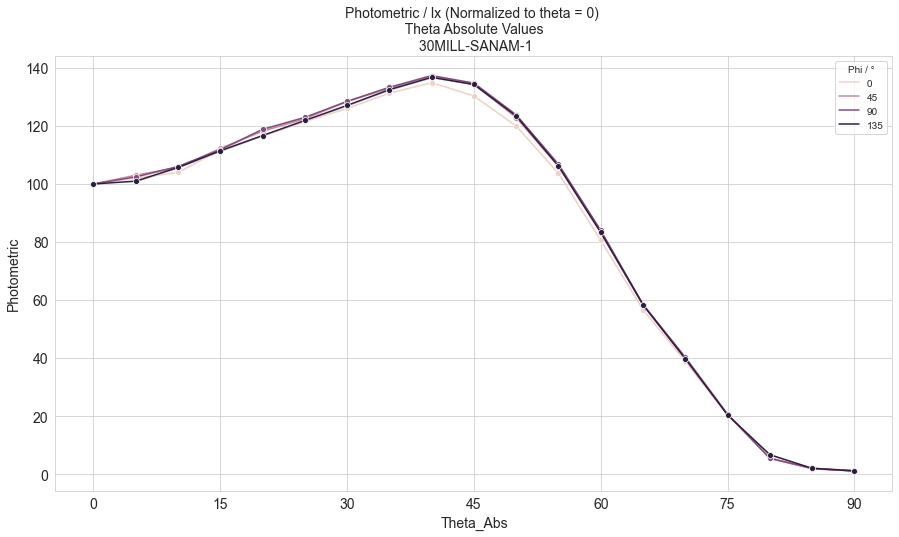

In [89]:
# Theta vs Photometric by Phi (Normalized to theta = 0) - Theta Absolute Values

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Phi / °', data=dfthetaz, ci=False, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0) \n Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Theta0_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Theta0_Abs.png', bbox_inches='tight');

# Photometric - Averaged by Theta Absolute Values

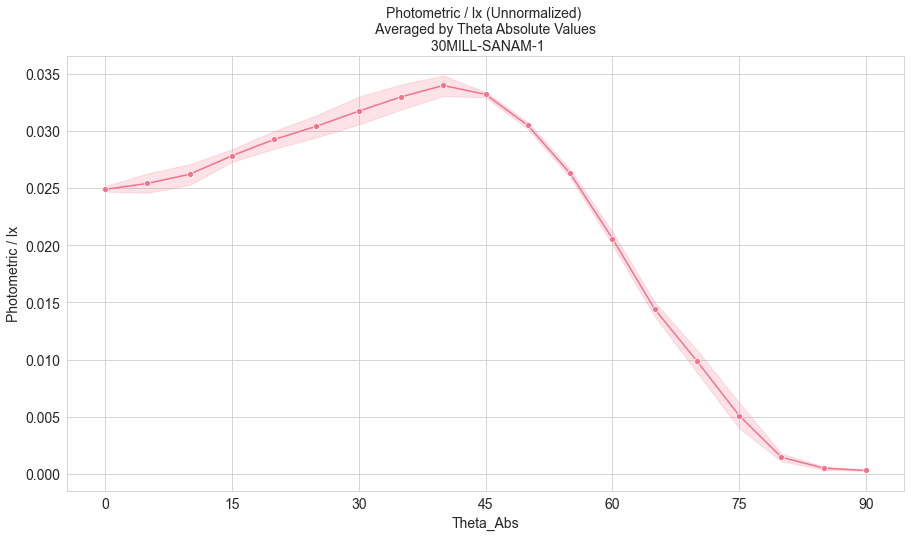

In [90]:
# Theta vs Photometric by Phi (Unnormalized) - Averaged by Theta Absolute Values

sns.lineplot(x='Theta_Abs', y='Photometric / lx', data=dfs, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.title('Photometric / lx (Unnormalized) \n Averaged by Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Unnorm_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Unnorm_AvgAbs.png', bbox_inches='tight');

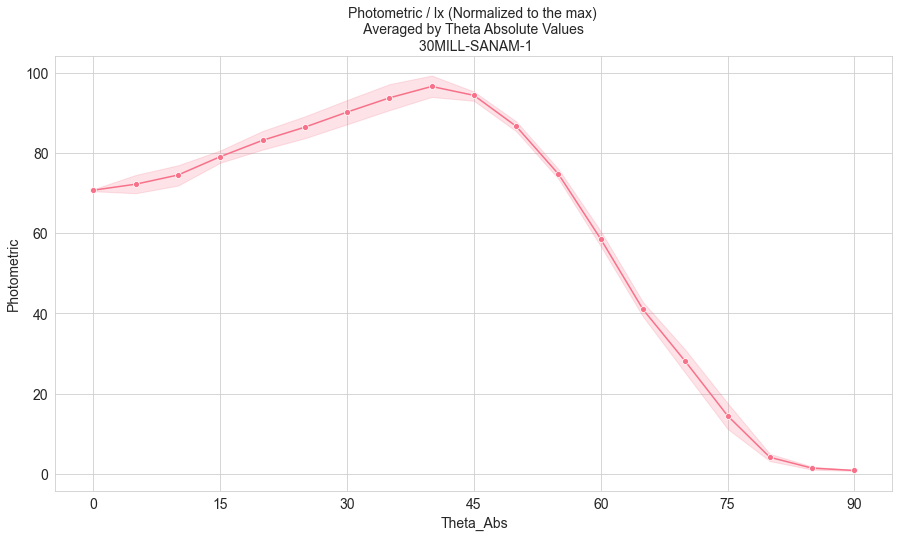

In [91]:
# Theta vs Photometric by Phi (Normalized to the max) - Averaged by Theta Absolute Values

sns.lineplot(x='Theta_Abs', y='Photometric / lx', data=dfmaxz, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max) \n Averaged by Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Max_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Max_AvgAbs.png', bbox_inches='tight');

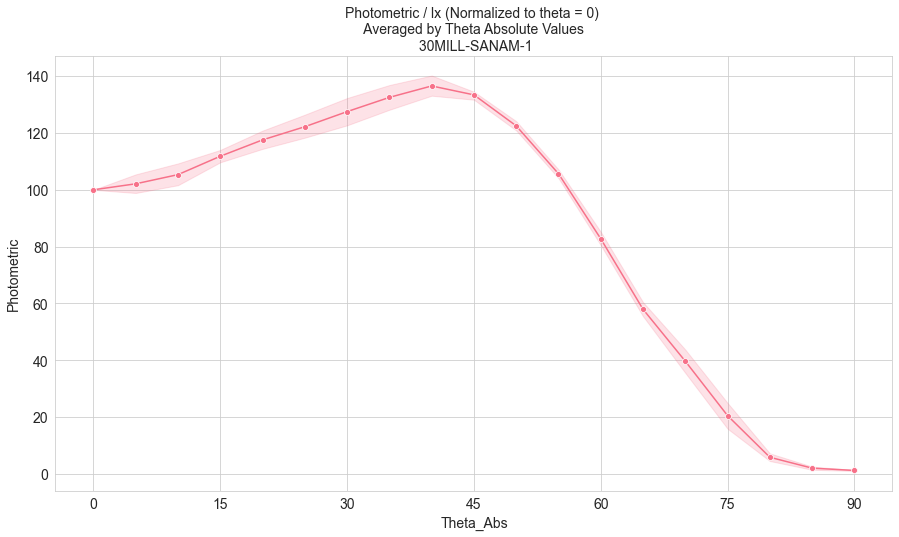

In [92]:
# Theta vs Photometric by Phi (Normalized to theta = 0) - Averaged by Theta Absolute Values

sns.lineplot(x='Theta_Abs', y='Photometric / lx', data=dfthetaz, marker='o')
plt.xticks(np.arange(0, 90+0.01, 15))
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0) \n Averaged by Theta Absolute Values \n ' + h, fontsize = 14)

if over == False:
    fname = output_f + '/' + h + '_Photo_Theta0_AvgAbs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_Photo_Theta0_AvgAbs.png', bbox_inches='tight');

# Polar Coordinates Plot

In [93]:
# Groupby theta and take means - able to draw a nice curve

dfmaxz_mean = dfmaxz.groupby('Theta_Abs').mean().reset_index()
dfmaxz_mean[sel] = dfmaxz_mean[sel]/100

In [94]:
import math  # Change degrees to radians for plotting
def deg_to_rad(dr):
    return (dr*math.pi)/180
theta = deg_to_rad(dfmaxz_mean['Theta_Abs'])
theta_abs = dfmaxz_mean['Theta_Abs']
r = dfmaxz_mean[sel]

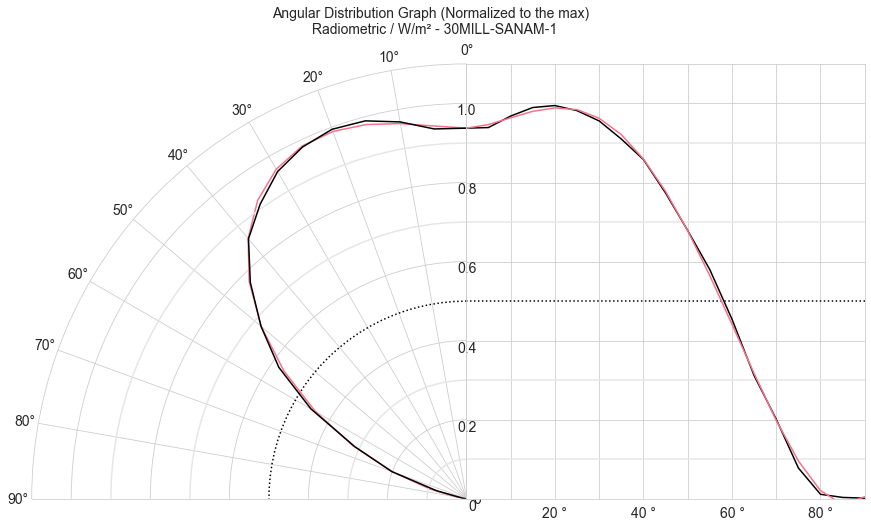

In [95]:
# Polar plot - Normalized to the max

from matplotlib import gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

fig = plt.figure()
fig.suptitle('Angular Distribution Graph (Normalized to the max) \n ' + sel + ' - ' + h, fontsize = 14)
gs = gridspec.GridSpec(1,2, width_ratios=[1,0.9]) 
ax0 = fig.add_subplot(gs[0], polar=True)
ax0.set_theta_zero_location("N") # Places 0 degrees to the North
ax0.plot(theta, r, c='black', zorder=111)
ax0.set_rlabel_position(90) # BUG: currently does not work with set_thetamin and thetamax - it should change labels to 90 deg
p = np.polyfit(theta, r, 4) # 4th order fit
yfit = np.polyval(p, theta)

# The fit plot
ax0.plot(theta, yfit, '-')
ax0.set_rlim(0,1.1)

# Radial = 0.5 plot
ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*0.5, color='black', linestyle='dotted')

# Add additional radial lines
lin = [0.1,0.3,0.7,0.9]
for i in lin:
    ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*i, color='0.9', linestyle='-')

ax0.set_thetamax(90) # Create a quarter polar graph

ax0.set_yticklabels([]) # Hide y-tick labels

# shared axis Y
ax1 = plt.subplot(gs[1], sharey = ax0)
ax1.tick_params(axis="y",direction="in", pad=-10)
ax1.plot(theta_abs, r, c='black')

# Only show tick labels multiple of 20
ax1.set_xticks([0,10,20,30,40,50,60,70,80,90])
xticks = ax1.xaxis.get_major_ticks()
xt = [0,1,3,5,7,9]
for x in xt:
    xticks[x].label1.set_visible(False)

ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0])

p = np.polyfit(theta_abs, r, 4)
yfit = np.polyval(p, theta_abs)

# The fit plot
ax1.plot(theta_abs, yfit, '-')

# Radial = 0.5 plot
ax1.hlines(y=0.5, xmin = 0, xmax = 90, color='black', linestyle='dotted')

# Add additional radial lines
for i in lin:
    ax1.hlines(y=i, xmin = 0, xmax = 90, color='0.9', linestyle='-')
    
#frequency = 2
#plt.xticks(dfthetaz_mean['Theta_Deg'][::frequency])

ax1.margins(x=0)

# Show tick labels below ticks
for tick in ax1.yaxis.get_majorticklabels():
    tick.set_verticalalignment("top")
    
# Add degree symbol to x-axis
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
    
# Shift plots as close as possible
plt.setp(ax0.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=-0.01, hspace=0)
if over == False:
    fname = output_f + '/' + h + '_Polar_Max_' + sel[:5] + '_'
    version_png_p(fname)
else:
    fig.savefig(output_f + '/' + h + '_Polar_Max_' + sel[:5] + '.png')
plt.show();

In [96]:
# Groupby theta and take means - able to draw a nice curve

dfthetaz_mean = dfthetaz.groupby('Theta_Abs').mean().reset_index()
dfthetaz_mean[sel] = dfthetaz_mean[sel]/100

In [97]:
import math  # Change degrees to radians for plotting
def deg_to_rad(dr):
    return (dr*math.pi)/180
theta = deg_to_rad(dfthetaz_mean['Theta_Abs'])
theta_abs = dfthetaz_mean['Theta_Abs']
r = dfthetaz_mean[sel]

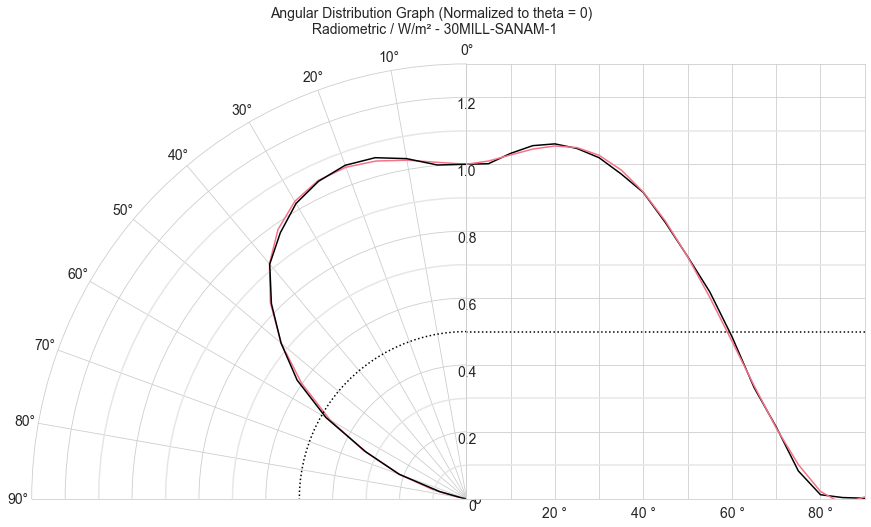

In [98]:
# Polar plot - Normalized to theta = 0

from matplotlib import gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

fig = plt.figure()
fig.suptitle('Angular Distribution Graph (Normalized to theta = 0) \n ' + sel + ' - ' + h, fontsize = 14)
gs = gridspec.GridSpec(1,2, width_ratios=[1,0.9]) 
ax0 = fig.add_subplot(gs[0], polar=True)
ax0.set_theta_zero_location("N") # Places 0 degrees to the North
ax0.plot(theta, r, c='black', zorder=111)
ax0.set_rlabel_position(90) # BUG: currently does not work with set_thetamin and thetamax - it should change labels to 90 deg
p = np.polyfit(theta, r, 4) # 4th order fit
yfit = np.polyval(p, theta)

# The fit plot
ax0.plot(theta, yfit, '-')
ax0.set_rlim(0,1.3)

# Radial = 0.5 plot
ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*0.5, color='black', linestyle='dotted')

# Add additional radial lines
lin = [0.1,0.3,0.7,0.9,1.1]
for i in lin:
    ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*i, color='0.9', linestyle='-')

ax0.set_thetamax(90) # Create a quarter polar graph

ax0.set_yticklabels([]) # Hide y-tick labels

# shared axis Y
ax1 = plt.subplot(gs[1], sharey = ax0)
ax1.tick_params(axis="y",direction="in", pad=-10)
ax1.plot(theta_abs, r, c='black')

# Only show tick labels multiple of 20
ax1.set_xticks([0,10,20,30,40,50,60,70,80,90])
xticks = ax1.xaxis.get_major_ticks()
xt = [0,1,3,5,7,9]
for x in xt:
    xticks[x].label1.set_visible(False)

ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0,1.2])

p = np.polyfit(theta_abs, r, 4)
yfit = np.polyval(p, theta_abs)

# The fit plot
ax1.plot(theta_abs, yfit, '-')

# Radial = 0.5 plot
ax1.hlines(y=0.5, xmin = 0, xmax = 90, color='black', linestyle='dotted')

# Add additional radial lines
for i in lin:
    ax1.hlines(y=i, xmin = 0, xmax = 90, color='0.9', linestyle='-')
    
#frequency = 2
#plt.xticks(dfthetaz_mean['Theta_Deg'][::frequency])

ax1.margins(x=0)

# Show tick labels below ticks
for tick in ax1.yaxis.get_majorticklabels():
    tick.set_verticalalignment("top")
    
# Add degree symbol to x-axis
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
    
# Shift plots as close as possible
plt.setp(ax0.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=-0.01, hspace=0)
if over == False:
    fname = output_f + '/' + h + '_Polar_Theta0_' + sel[:5] + '_'
    version_png_p(fname)
else:
    fig.savefig(output_f + '/' + h + '_Polar_Theta0_' + sel[:5] + '.png')
plt.show();

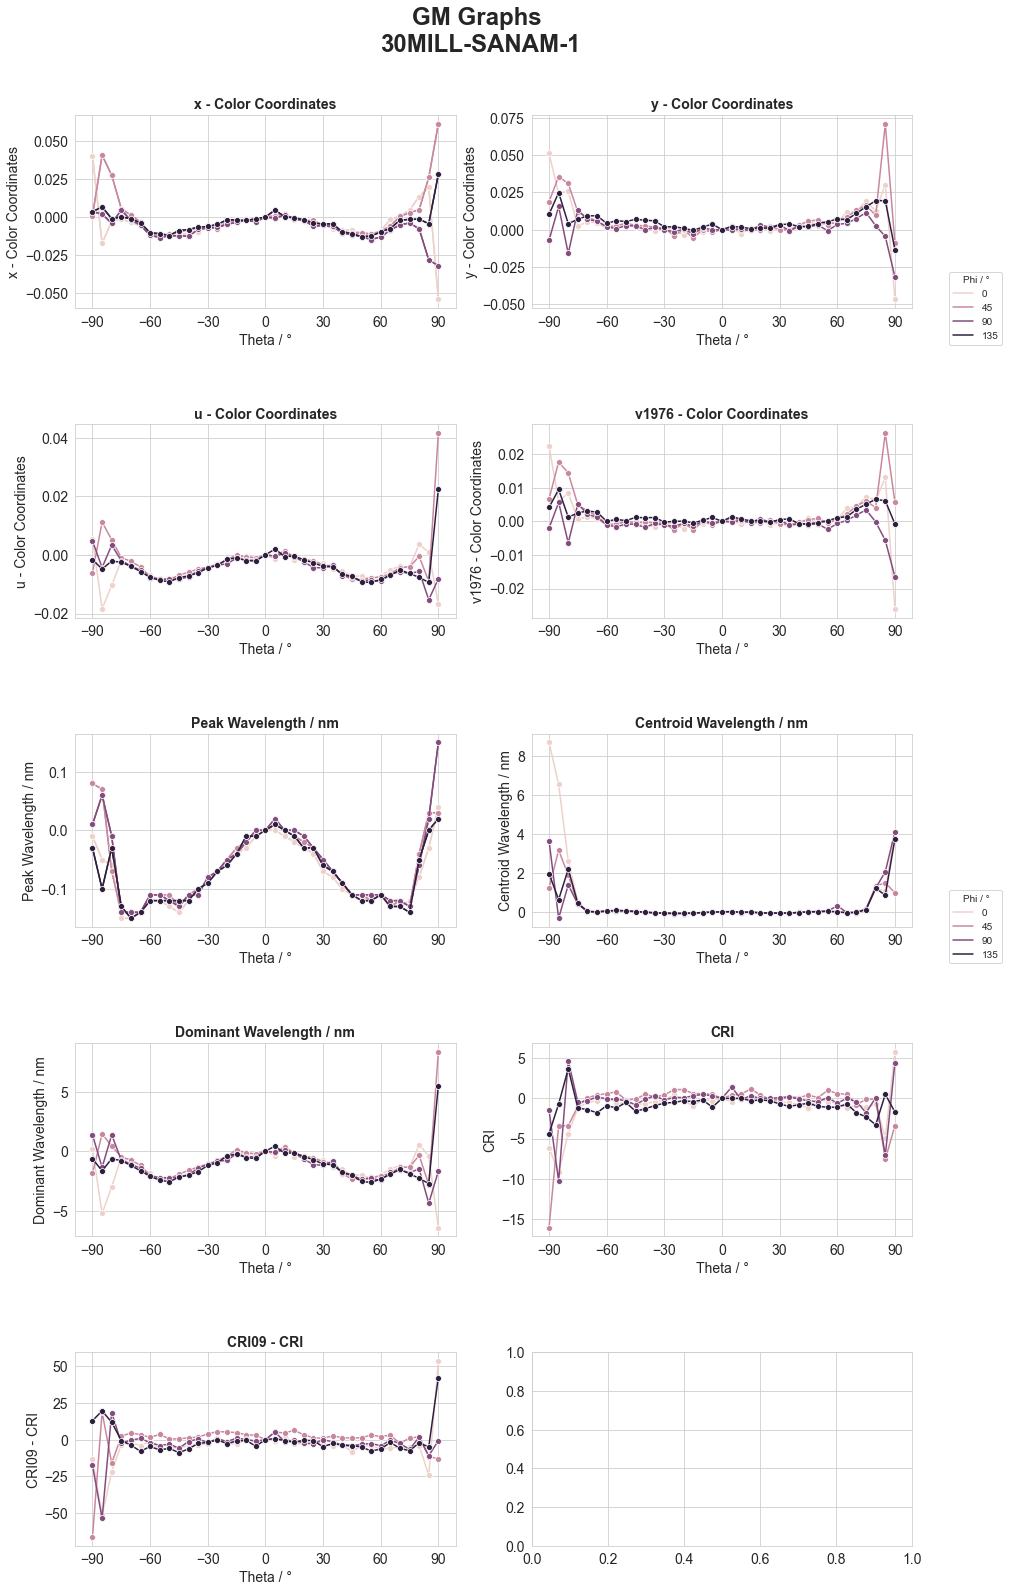

In [99]:
# Rest of the columns

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})

plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('GM Graphs \n' + h, fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b) in zip(y_n, ax_n):

    c = sns.lineplot(ax=axes[b], x='Theta / °', y=a, hue='Phi / °', data=dfthetaz, ci=False, legend=False, marker='o')

    axes[b].set_title(a, fontweight = 'bold', fontsize = 14)
    c.set(xticks=np.arange(-90, 90+0.01, 30))
 
 # Re-added c1 for legend
c1 = sns.lineplot(ax=axes[0,0], x='Theta / °', y=y1, hue='Phi / °', data=dfthetaz, ci=False, marker='o')

axes[0,0].set_title(y1, fontweight = 'bold', fontsize = 14)
c1.legend(loc='right', bbox_to_anchor=(2.45, 0), ncol=1).set_title('Phi / °') # , prop={'size': 6} <- increase legend size
c1.set_zorder(1)

c5 = sns.lineplot(ax=axes[2,0], x='Theta / °', y=y5, hue='Phi / °', data=dfthetaz, ci=False, marker='o')

axes[2,0].set_title(y5, fontweight = 'bold', fontsize = 14)
c5.legend(loc='right', bbox_to_anchor=(2.45, 0), ncol=1).set_title('Phi / °') # , prop={'size': 6} <- increase legend size
c5.set_zorder(1)

# pass the figure to the custom window
#a = ScrollableWindow(f);

In [100]:
if over == False:
    fname = output_f + '/' + h + '_GM_Graphs_'
    version_png_f(fname)
else:
    f.savefig(output_f + '/' + h + '_GM_Graphs.png')

In [101]:
zero = dfthetaz[dfthetaz['Theta / °'] == 0]
zero = zero[['Phi / °', 'x - Color Coordinates', 'y - Color Coordinates']]
df_cols = ["Phi / °", 
           "delta x",
           "delta y"]
zero.columns = df_cols

In [102]:
new = dfthetaz.merge(zero) # Change if wrong
new['delta x'] = (new['x - Color Coordinates'] - new['delta x']).fillna('-')
new['delta y'] = (new['y - Color Coordinates'] - new['delta y']).fillna('-')
new = new[["Theta / °", "delta x", "delta y"]]
new_df = pd.melt(new, id_vars=['Theta / °'], var_name='Legend', value_name='Δ x, Δ y')

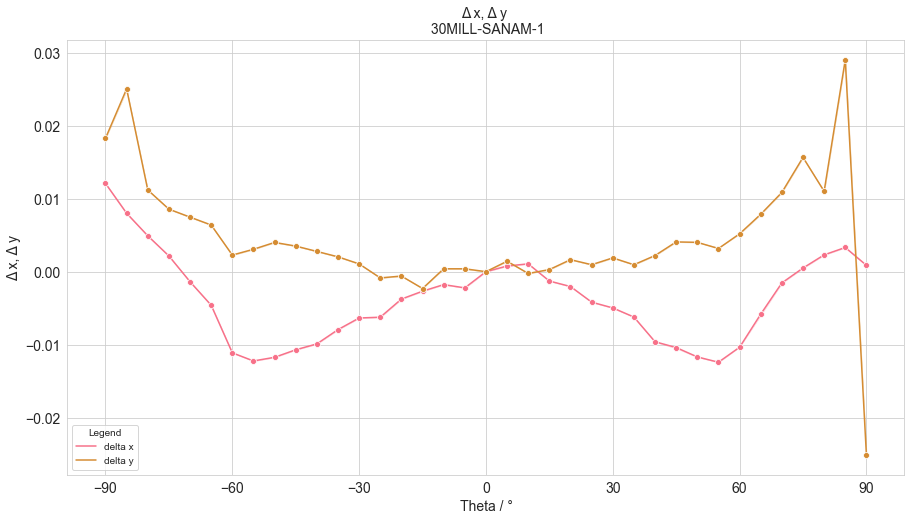

In [103]:
# Plot delta x and y

sns.lineplot(x='Theta / °', y='Δ x, Δ y', hue="Legend", data=new_df, ci=False, marker='o')
plt.xticks(np.arange(-90, 90+0.01, 30))
plt.title('Δ x, Δ y \n ' + h, fontsize = 14)
if over == False:
    fname = output_f + '/' + h + '_deltaxy_'
    version_png(fname)
else:
    plt.savefig(output_f + '/' + h + '_deltaxy.png', bbox_inches='tight');

In [104]:
# Export as Excel Worksheet if needed

if exp == True:
    with pd.ExcelWriter(output_f + '/' + h + '_output.xlsx') as writer:
        dfs.to_excel(writer, sheet_name='Original Data', index=False)
        dfmaxz.to_excel(writer, sheet_name='Normalized to Theta Max', index=False)
        dfthetaz.to_excel(writer, sheet_name='Normalized to Theta = 0', index=False)
else:
    pass

In [105]:
# Kills script so appendix doesn't run
sys.exit()

SystemExit: 